#Machine Learning and FinTech 2023/24 Project
#Predicting ETF Price Movements Using Market Factors
Author:Chan Nok Hang 312707025

#Motivation


The motivation behind this project stems from a deep interest in understanding and predicting the price movements of an Exchange-Traded Fund (ETF) that traces the S&P 500 index,as I personally own some of these ETF. The S&P 500, being a benchmark for the broader U.S. stock market, presents a compelling landscape for analysis and prediction, and an ETF tracking this index serves as an accessible vehicle for market participation.

Significance of the S&P 500-Tracking ETF:
The S&P 500 index, comprising leading companies across various sectors, reflects the overall health and performance of the U.S. stock market. Investing in an ETF that tracks the S&P 500 provides exposure to a diversified portfolio of major corporations, making it an attractive investment option for both institutional and individual investors.

Key Objectives of the Project:
1. Price Movement Analysis:
Investigate historical price movements of the S&P 500-tracking ETF to identify trends, patterns, and potential correlations with market events.

2. Prediction Challenge:
Address the challenge of predicting the future price movements of the ETF, leveraging a combination of traditional financial indicators and advanced machine learning techniques.

3. Risk Management Considerations:
Explore strategies for risk management based on predicted price movements, including the implementation of stop-loss orders and take-profit levels.

Relevance of Technical Indicators:\
The project integrates technical indicators as crucial elements in the prediction model. These indicators, derived from historical price and volume data, are selected based on their potential to capture market trends, momentum, and volatility. By utilizing these indicators, the aim is to enhance the accuracy of price predictions and inform strategic decision-making.

Contribution to Financial Analysis:\
This project seeks to contribute to the field of financial analysis by providing insights into the dynamics of an S&P 500-tracking ETF. The findings may have implications for investors, portfolio managers, and researchers interested in optimizing investment strategies and understanding the factors influencing ETF performance.

In summary, this project is motivated by the desire to gain a deeper understanding of the S&P 500-tracking ETF's behavior, predict future price movements, and contribute valuable insights to the broader field of financial analysis.

#Data Collection


Here's a list of the data I may need:

1. **Historical ETF Price Data:**
   - Daily, weekly, or monthly price data for the specific ETF I want to analyze.

2. **Historical Index Price Data:**
   - Price data for the index that the ETF tracks. This can be a benchmark index like the S&P 500, Dow Jones, or a specialized index.

3. **Exchange Rate Data:**
   - Daily or periodic exchange rate data if the ETF involves cross-border investments or foreign currency exposure.

4. **Risk-Free Interest Rate Data:**
   - Data on risk-free interest rates, such as government bond yields. For example, data on the yield of 10-year U.S. Treasury bonds.

5. **Commodities Prices Data:**
   - Historical prices for commodities that may impact the ETF, such as gold and oil. This data can be sourced from commodities futures markets.

8. **News and Events Data:**
   - News articles, press releases, or event data that could impact the ETF. Sentiment analysis of news can also be valuable.

9. **Trading Volume Data:**
   - Daily or intraday trading volume for both the ETF and futures contracts. This can help assess liquidity and market participation.

10. **Options Data (if applicable):**
    - If options are available for the ETF, you may want data on options prices and trading activity.

11. **Market Sentiment Data:**
    - Sentiment indicators, such as the CBOE Volatility Index (VIX), which can provide insights into market sentiment and volatility.

12. **Fundamental Data (if applicable):**
    - If the ETF holds individual stocks or bonds, you might need fundamental data for those assets.

13. **Calendar and Seasonal Data:**
    - Data on important economic events and seasonal patterns relevant to the ETF's performance.

14. **Futures Contract Details:**
    - Contract specifications, including expiration dates, tick sizes, and margin requirements for futures contracts.

16. **Historical Volatility Data:**
    - Volatility measures for the ETF and the index, such as historical volatility or implied volatility if options data is available.

17. **Macroeconomic Data:**
    - Economic indicators and data that provide context for the overall economic environment, such as GDP growth, interest rates, and employment figures.

Data that I choose to use:
1. daily-treasury-rates: 4 WEEKS BANK DISCOUNT, 4 WEEKS COUPON EQUIVALENT, 8 WEEKS BANK DISCOUNT, 8 WEEKS COUPON EQUIVALENT
2. daily-treasury-long-term-rates: LT COMPOSITE (>10 Yrs)
3. daily-treasury-real-long-term-rates: LT Real Average (10> Yrs)
4. S&P500: 2021/1/1 to 2023/11/1
5. SPY: 2021/1/1 to 2023/11/1
6. SPLG: 2021/1/1 to 2023/11/1
7. technical indicator: e.g. MACD,RSI,DMI

#Data Preprocessing

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Load data

In [ ]:
sp500=pd.read_csv('/content/drive/MyDrive/MLFT/data/SP500.csv')
sp500.head()

,date,open,high,low,close,volume,change_percent,avg_vol_20d
0,1927-12-30,17.66,17.66,17.66,17.66,0,NaN,NaN
1,1928-01-03,17.76,17.76,17.76,17.76,0,0.57,NaN
2,1928-01-04,17.72,17.72,17.72,17.72,0,-0.23,NaN
3,1928-01-05,17.55,17.55,17.55,17.55,0,-0.96,NaN
4,1928-01-06,17.66,17.66,17.66,17.66,0,0.63,NaN


In [ ]:
sp500.describe()

,open,high,low,close,volume,change_percent,avg_vol_20d
count,24075.000000,24075.000000,24075.000000,24075.000000,2.407500e+04,24074.000000,2.405600e+04
mean,601.839369,605.419115,598.028257,601.951590,8.695019e+08,0.029942,8.687074e+08
std,961.209327,966.704600,955.296254,961.335031,1.573767e+09,1.197340,1.544906e+09
min,4.400000,4.400000,4.400000,4.400000,0.000000e+00,-20.470000,0.000000e+00
25%,24.540000,24.540000,24.540000,24.540000,1.470000e+06,-0.460000,1.580875e+06
50%,101.680000,102.440000,100.880000,101.680000,1.950000e+07,0.050000,1.938675e+07
75%,984.715000,993.635000,974.250000,985.170000,8.724000e+08,0.550000,8.968790e+08
max,4804.509800,4818.620100,4780.040000,4796.560100,1.145623e+10,16.610000,7.701906e+09


In [ ]:
spy=pd.read_csv('/content/drive/MyDrive/MLFT/data/SPY.csv')
spy.head()

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
0,1993-01-29,43.8595,43.9688,43.7500,43.9375,1003200,24.9370,NaN,NaN
1,1993-02-01,43.9688,44.2500,43.9688,44.2500,480500,25.1144,0.71,NaN
2,1993-02-02,44.2188,44.3750,44.1250,44.3438,201300,25.1676,0.21,NaN
3,1993-02-03,44.4063,44.8438,44.3750,44.8125,529400,25.4337,1.06,NaN
4,1993-02-04,44.9688,45.0938,44.8750,45.0000,531500,25.5401,0.42,NaN


In [ ]:
spy.describe()

,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
count,7746.000000,7746.000000,7746.000000,7746.000000,7.746000e+03,7746.000000,7745.000000,7.727000e+03
mean,168.974352,169.995264,167.844531,168.979599,8.460772e+07,141.011739,0.043533,8.469914e+07
std,104.910634,105.481211,104.297869,104.928471,9.261718e+07,110.882827,1.183515,8.539171e+07
min,43.343800,43.531300,42.812500,43.406300,5.200000e+03,24.635500,-10.940000,7.584500e+04
25%,104.974100,105.895000,104.282500,105.055000,9.855100e+06,70.775775,-0.450000,9.458408e+06
50%,131.852500,132.770000,130.938750,131.870000,6.296061e+07,93.625250,0.070000,6.831706e+07
75%,209.522500,210.418750,208.845000,209.770000,1.165697e+08,181.149625,0.600000,1.189833e+08
max,479.220000,479.980000,476.060000,477.710000,8.715469e+08,464.921800,14.520000,5.389658e+08


In [ ]:
splg=pd.read_csv('/content/drive/MyDrive/MLFT/data/SPLG-5yr.csv')
splg.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-04,36.160000,36.169998,36.029999,36.060001,33.745369,1093800
1,2019-11-05,36.119999,36.130001,35.970001,36.009998,33.698566,751800
2,2019-11-06,36.029999,36.049999,35.900002,36.020000,33.707932,469900
3,2019-11-07,36.209999,36.290001,36.080002,36.150002,33.829586,774600
4,2019-11-08,36.130001,36.240002,36.009998,36.240002,33.913815,388600


In [ ]:
splg.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,45.861809,46.150179,45.548260,45.870924,44.524557,3.515154e+06
std,6.243019,6.221086,6.265036,6.239339,6.565484,2.558366e+06
min,26.820000,26.900000,25.620001,26.139999,24.747408,2.455000e+05
25%,41.150002,41.410001,41.007500,41.177499,39.294104,1.971300e+06
50%,46.975001,47.305000,46.550001,46.914999,46.167507,2.905350e+06
75%,50.887500,51.267499,50.549999,51.000000,49.832897,4.287525e+06
max,56.349998,56.439999,55.980000,56.189999,54.626698,2.573960e+07


In [ ]:
tr19=pd.read_csv('/content/drive/MyDrive/MLFT/data/2019daily-treasury-rates.csv')
tr19.head()

,Date,4 WEEKS BANK DISCOUNT,4 WEEKS COUPON EQUIVALENT,8 WEEKS BANK DISCOUNT,8 WEEKS COUPON EQUIVALENT,13 WEEKS BANK DISCOUNT,13 WEEKS COUPON EQUIVALENT,26 WEEKS BANK DISCOUNT,26 WEEKS COUPON EQUIVALENT,52 WEEKS BANK DISCOUNT,52 WEEKS COUPON EQUIVALENT
0,12/31/2019,1.45,1.48,1.48,1.51,1.52,1.55,1.56,1.60,1.55,1.59
1,12/30/2019,1.48,1.51,1.50,1.53,1.54,1.57,1.56,1.60,1.53,1.57
2,12/27/2019,1.53,1.56,1.53,1.56,1.54,1.57,1.55,1.59,1.47,1.51
3,12/26/2019,1.56,1.59,1.57,1.60,1.55,1.58,1.57,1.61,1.49,1.53
4,12/24/2019,1.52,1.55,1.55,1.58,1.55,1.58,1.57,1.61,1.49,1.53


In [ ]:
tr20=pd.read_csv('/content/drive/MyDrive/MLFT/data/2020daily-treasury-rates.csv')
tr20.head()

,Date,4 WEEKS BANK DISCOUNT,4 WEEKS COUPON EQUIVALENT,8 WEEKS BANK DISCOUNT,8 WEEKS COUPON EQUIVALENT,13 WEEKS BANK DISCOUNT,13 WEEKS COUPON EQUIVALENT,26 WEEKS BANK DISCOUNT,26 WEEKS COUPON EQUIVALENT,52 WEEKS BANK DISCOUNT,52 WEEKS COUPON EQUIVALENT
0,12/31/2020,0.08,0.08,0.08,0.08,0.09,0.09,0.09,0.09,0.10,0.10
1,12/30/2020,0.06,0.06,0.06,0.06,0.08,0.08,0.09,0.09,0.12,0.12
2,12/29/2020,0.08,0.08,0.09,0.09,0.10,0.10,0.12,0.12,0.11,0.11
3,12/28/2020,0.09,0.09,0.10,0.10,0.11,0.11,0.11,0.11,0.11,0.11
4,12/24/2020,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.10,0.10


In [ ]:
tr21=pd.read_csv('/content/drive/MyDrive/MLFT/data/2021daily-treasury-rates.csv')
tr21.head()

,Date,4 WEEKS BANK DISCOUNT,4 WEEKS COUPON EQUIVALENT,8 WEEKS BANK DISCOUNT,8 WEEKS COUPON EQUIVALENT,13 WEEKS BANK DISCOUNT,13 WEEKS COUPON EQUIVALENT,26 WEEKS BANK DISCOUNT,26 WEEKS COUPON EQUIVALENT,52 WEEKS BANK DISCOUNT,52 WEEKS COUPON EQUIVALENT
0,12/31/2021,0.06,0.06,0.05,0.05,0.06,0.06,0.19,0.19,0.38,0.39
1,12/30/2021,0.06,0.06,0.06,0.06,0.05,0.05,0.19,0.19,0.37,0.38
2,12/29/2021,0.01,0.01,0.02,0.02,0.05,0.05,0.19,0.19,0.38,0.39
3,12/28/2021,0.03,0.03,0.04,0.04,0.06,0.06,0.20,0.20,0.38,0.39
4,12/27/2021,0.04,0.04,0.05,0.05,0.06,0.06,0.21,0.21,0.30,0.30


In [ ]:
tr22=pd.read_csv('/content/drive/MyDrive/MLFT/data/2022daily-treasury-rates.csv')
tr22.head()

,Date,4 WEEKS BANK DISCOUNT,4 WEEKS COUPON EQUIVALENT,8 WEEKS BANK DISCOUNT,8 WEEKS COUPON EQUIVALENT,13 WEEKS BANK DISCOUNT,13 WEEKS COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,17 WEEKS COUPON EQUIVALENT,26 WEEKS BANK DISCOUNT,26 WEEKS COUPON EQUIVALENT,52 WEEKS BANK DISCOUNT,52 WEEKS COUPON EQUIVALENT
0,12/30/2022,3.95,4.02,4.30,4.39,4.30,4.40,4.57,4.70,4.60,4.77,4.51,4.73
1,12/29/2022,3.88,3.95,4.28,4.37,4.34,4.45,4.54,4.67,4.57,4.74,4.48,4.70
2,12/28/2022,3.57,3.63,4.08,4.16,4.35,4.46,4.55,4.68,4.59,4.76,4.49,4.71
3,12/27/2022,3.62,3.68,4.09,4.17,4.35,4.46,4.49,4.62,4.60,4.77,4.52,4.75
4,12/23/2022,3.65,3.71,4.01,4.09,4.23,4.33,4.45,4.58,4.52,4.69,4.46,4.67


In [ ]:
tr23=pd.read_csv('/content/drive/MyDrive/MLFT/data/2023daily-treasury-rates.csv')
tr23.head()

,Date,4 WEEKS BANK DISCOUNT,4 WEEKS COUPON EQUIVALENT,8 WEEKS BANK DISCOUNT,8 WEEKS COUPON EQUIVALENT,13 WEEKS BANK DISCOUNT,13 WEEKS COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,17 WEEKS COUPON EQUIVALENT,26 WEEKS BANK DISCOUNT,26 WEEKS COUPON EQUIVALENT,52 WEEKS BANK DISCOUNT,52 WEEKS COUPON EQUIVALENT
0,11/02/2023,5.29,5.40,5.30,5.43,5.28,5.44,5.32,5.51,5.29,5.53,5.09,5.38
1,11/01/2023,5.29,5.40,5.31,5.44,5.31,5.47,5.33,5.52,5.30,5.54,5.08,5.37
2,10/31/2023,5.29,5.40,5.33,5.46,5.33,5.49,5.34,5.53,5.33,5.57,5.14,5.44
3,10/30/2023,5.29,5.40,5.33,5.46,5.33,5.49,5.34,5.53,5.32,5.56,5.15,5.43
4,10/27/2023,5.30,5.41,5.33,5.46,5.32,5.48,5.33,5.52,5.32,5.55,5.13,5.41


In [ ]:
tlongr19=pd.read_csv('/content/drive/MyDrive/MLFT/data/2019daily-treasury-long-term-rates.csv')
tlongr19.head()

,Date,LT COMPOSITE (>10 Yrs),TREASURY 20-Yr CMT
0,12/31/2019,2.31,2.25
1,12/30/2019,2.27,2.21
2,12/27/2019,2.25,2.18
3,12/26/2019,2.26,2.19
4,12/24/2019,2.26,2.20


In [ ]:
tlongr20=pd.read_csv('/content/drive/MyDrive/MLFT/data/2020daily-treasury-long-term-rates.csv')
tlongr20.head()

,Date,LT COMPOSITE (>10 Yrs),TREASURY 20-Yr CMT
0,12/31/2020,1.46,1.45
1,12/30/2020,1.47,1.46
2,12/29/2020,1.48,1.47
3,12/28/2020,1.47,1.46
4,12/24/2020,1.47,1.46


In [ ]:
tlongr21=pd.read_csv('/content/drive/MyDrive/MLFT/data/2021daily-treasury-long-term-rates.csv')
tlongr21.head()

,Date,LT COMPOSITE (>10 Yrs),TREASURY 20-Yr CMT
0,12/31/2021,1.89,1.94
1,12/30/2021,1.91,1.97
2,12/29/2021,1.94,2.00
3,12/28/2021,1.88,1.94
4,12/27/2021,1.87,1.92


In [ ]:
tlongr22=pd.read_csv('/content/drive/MyDrive/MLFT/data/2022daily-treasury-long-term-rates.csv')
tlongr22.head()

,Date,LT COMPOSITE (>10 Yrs),TREASURY 20-Yr CMT
0,12/30/2022,4.11,4.14
1,12/29/2022,4.06,4.09
2,12/28/2022,4.11,4.13
3,12/27/2022,4.07,4.10
4,12/23/2022,3.97,3.99


In [ ]:
tlongr23=pd.read_csv('/content/drive/MyDrive/MLFT/data/2023daily-treasury-long-term-rates.csv')
tlongr23.head()

,Date,LT COMPOSITE (>10 Yrs),TREASURY 20-Yr CMT
0,11/02/2023,4.96,4.99
1,11/01/2023,5.10,5.13
2,10/31/2023,5.18,5.21
3,10/30/2023,5.19,5.21
4,10/27/2023,5.17,5.19


In [ ]:
trlr19=pd.read_csv('/content/drive/MyDrive/MLFT/data/2019daily-treasury-real-long-term-rates.csv')
trlr19.head()

,Date,LT Real Average (10> Yrs)
0,12/31/2019,0.53
1,12/30/2019,0.51
2,12/27/2019,0.50
3,12/26/2019,0.50
4,12/24/2019,0.49


In [ ]:
trlr20=pd.read_csv('/content/drive/MyDrive/MLFT/data/2020daily-treasury-real-long-term-rates.csv')
trlr20.head()

,Date,LT Real Average (10> Yrs)
0,12/31/2020,-0.48
1,12/30/2020,-0.45
2,12/29/2020,-0.45
3,12/28/2020,-0.46
4,12/24/2020,-0.46


In [ ]:
trlr21=pd.read_csv('/content/drive/MyDrive/MLFT/data/2021daily-treasury-real-long-term-rates.csv')
trlr21.head()

,Date,LT Real Average (10> Yrs)
0,12/31/2021,-0.52
1,12/30/2021,-0.51
2,12/29/2021,-0.45
3,12/28/2021,-0.48
4,12/27/2021,-0.50


In [ ]:
trlr22=pd.read_csv('/content/drive/MyDrive/MLFT/data/2022daily-treasury-real-long-term-rates.csv')
trlr22.head()

,Date,LT Real Average (10> Yrs)
0,12/30/2022,1.78
1,12/29/2022,1.74
2,12/28/2022,1.79
3,12/27/2022,1.76
4,12/23/2022,1.72


In [ ]:
trlr23=pd.read_csv('/content/drive/MyDrive/MLFT/data/2023daily-treasury-real-long-term-rates.csv')
trlr23.head()

,Date,LT Real Average (10> Yrs)
0,11/02/2023,2.40
1,11/01/2023,2.52
2,10/31/2023,2.59
3,10/30/2023,2.59
4,10/27/2023,2.59


##Merge data by date and create a new dataset

In [ ]:
import pandas as pd

# Initialize an empty DataFrame to store the merged data
etfpred = pd.DataFrame()

# Add a date column
etfpred['date'] = pd.to_datetime([])

# Convert date column to datetime format
splg['date'] = pd.to_datetime(splg['Date'])

# Merge splg date into etfpred based on the 'date' column
etfpred = pd.merge(etfpred, splg['date'], on='date', how='outer')

# Merge splg Adj Close into etfpred
etfpred['splg']=splg['Adj Close']

# Print the merged DataFrame
print(etfpred)

           date       splg
0    2019-11-04  33.745369
1    2019-11-05  33.698566
2    2019-11-06  33.707932
3    2019-11-07  33.829586
4    2019-11-08  33.913815
...         ...        ...
1001 2023-10-26  48.509998
1002 2023-10-27  48.290001
1003 2023-10-30  48.860001
1004 2023-10-31  49.189999
1005 2023-11-01  49.720001

[1006 rows x 2 columns]


In [ ]:
# Convert date column to datetime format
spy['date'] = pd.to_datetime(spy['date'])

# Select part of data
spy=spy.loc[spy['date'] >= '2019-11-04']

# Merge 'spy' Adj Close into 'etfpred' based on 'date'
etfpred = pd.merge(etfpred, spy[['date', 'adjusted_close']], how='left', left_on='date', right_on='date')

# Rename the merged column to 'spy'
etfpred.rename(columns={'adjusted_close': 'spy'}, inplace=True)

# Print the merged DataFrame
print(etfpred)

           date       splg       spy
0    2019-11-04  33.745369  288.3752
1    2019-11-05  33.698566  288.0562
2    2019-11-06  33.707932  288.1219
3    2019-11-07  33.829586  289.1351
4    2019-11-08  33.913815  289.8482
...         ...        ...       ...
1001 2023-10-26  48.509998  412.5500
1002 2023-10-27  48.290001  410.6800
1003 2023-10-30  48.860001  415.5900
1004 2023-10-31  49.189999  418.2000
1005 2023-11-01  49.720001  422.6600

[1006 rows x 3 columns]


In [ ]:
# Convert date column to datetime format
sp500['date'] = pd.to_datetime(sp500['date'])

# Select part of data
sp500=sp500.loc[sp500['date'] >= '2019-11-04']

# Merge additional columns from 'sp500' into 'etfpred' based on 'date'
columns_to_merge = ['date', 'open', 'high', 'low', 'close', 'volume', 'change_percent']
etfpred = pd.merge(etfpred, sp500[columns_to_merge], how='left', left_on='date', right_on='date')

# Print the merged DataFrame
print(etfpred)

           date       splg       spy       open       high        low  \
0    2019-11-04  33.745369  288.3752  3078.9600  3085.2000  3074.8701   
1    2019-11-05  33.698566  288.0562  3080.8000  3083.9500  3072.1499   
2    2019-11-06  33.707932  288.1219  3075.1001  3078.3401  3065.8899   
3    2019-11-07  33.829586  289.1351  3087.0200  3097.7700  3080.2300   
4    2019-11-08  33.913815  289.8482  3081.2500  3093.0901  3073.5801   
...         ...        ...       ...        ...        ...        ...   
1001 2023-10-26  48.509998  412.5500  4175.9902  4183.6001  4127.8999   
1002 2023-10-27  48.290001  410.6800  4152.9302  4156.7002  4103.7798   
1003 2023-10-30  48.860001  415.5900  4139.3901  4177.4702  4132.9399   
1004 2023-10-31  49.189999  418.2000  4171.3301  4195.5498  4153.1201   
1005 2023-11-01  49.720001  422.6600  4201.2700  4245.6401  4197.7402   

          close      volume  change_percent  
0     3078.2700  4146850000            0.37  
1     3074.6201  4486130000    

## Concatenate treasury rate datasets and merge into one file

### Daily-treasury-rates

In [ ]:
# Sort the data with date
tr19['Date'] = pd.to_datetime(tr19['Date'])
tr19 = tr19.sort_values(by='Date')

tr20['Date'] = pd.to_datetime(tr20['Date'])
tr20 = tr20.sort_values(by='Date')

tr21['Date'] = pd.to_datetime(tr21['Date'])
tr21 = tr21.sort_values(by='Date')

tr22['Date'] = pd.to_datetime(tr22['Date'])
tr22 = tr22.sort_values(by='Date')

tr23['Date'] = pd.to_datetime(tr23['Date'])
tr23 = tr23.sort_values(by='Date')

In [ ]:
# concatenating daily treasury rates data along rows
treasury_rates1=pd.DataFrame()
treasury_rates1 = pd.concat([tr19, tr20, tr21, tr22, tr23], axis=0)

# Drop some unuse variable
cols_to_keep = ['Date','4 WEEKS BANK DISCOUNT','4 WEEKS COUPON EQUIVALENT','8 WEEKS BANK DISCOUNT','8 WEEKS COUPON EQUIVALENT']
treasury_rates1=treasury_rates1.drop(treasury_rates1.columns.difference(cols_to_keep), axis=1)

# Select part of data
treasury_rates1=treasury_rates1.loc[treasury_rates1['Date'] >= '2019-11-04']
treasury_rates1

,Date,4 WEEKS BANK DISCOUNT,4 WEEKS COUPON EQUIVALENT,8 WEEKS BANK DISCOUNT,8 WEEKS COUPON EQUIVALENT
38,2019-11-04,1.55,1.58,1.54,1.57
37,2019-11-05,1.53,1.56,1.54,1.57
36,2019-11-06,1.52,1.55,1.53,1.56
35,2019-11-07,1.54,1.57,1.54,1.57
34,2019-11-08,1.53,1.56,1.53,1.56
...,...,...,...,...,...
4,2023-10-27,5.30,5.41,5.33,5.46
3,2023-10-30,5.29,5.40,5.33,5.46
2,2023-10-31,5.29,5.40,5.33,5.46
1,2023-11-01,5.29,5.40,5.31,5.44


#### Daily-treasury-long-term-rates

In [ ]:
# Sort the data with date
tlongr19['Date'] = pd.to_datetime(tlongr19['Date'])
tlongr19 = tlongr19.sort_values(by='Date')

tlongr20['Date'] = pd.to_datetime(tlongr20['Date'])
tlongr20 = tlongr20.sort_values(by='Date')

tlongr21['Date'] = pd.to_datetime(tlongr21['Date'])
tlongr21 = tlongr21.sort_values(by='Date')

tlongr22['Date'] = pd.to_datetime(tlongr22['Date'])
tlongr22 = tlongr22.sort_values(by='Date')

tlongr23['Date'] = pd.to_datetime(tlongr23['Date'])
tlongr23 = tlongr23.sort_values(by='Date')

In [ ]:
# concatenating daily treasury long term rates data along rows
treasury_rates2=pd.DataFrame()
treasury_rates2 = pd.concat([tlongr19, tlongr20, tlongr21, tlongr22, tlongr23], axis=0)

# Drop unuse variable
treasury_rates2 = treasury_rates2.drop(['TREASURY 20-Yr CMT'], axis=1)

# Select part of data
treasury_rates2=treasury_rates2.loc[treasury_rates2['Date'] >= '2019-11-04']
treasury_rates2

,Date,LT COMPOSITE (>10 Yrs)
38,2019-11-04,2.18
37,2019-11-05,2.25
36,2019-11-06,2.21
35,2019-11-07,2.32
34,2019-11-08,2.35
...,...,...
4,2023-10-27,5.17
3,2023-10-30,5.19
2,2023-10-31,5.18
1,2023-11-01,5.10


#### daily-treasury-real-long-term-rates

In [ ]:
# Sort the data with date
trlr19['Date'] = pd.to_datetime(trlr19['Date'])
trlr19 = trlr19.sort_values(by='Date')

trlr20['Date'] = pd.to_datetime(trlr20['Date'])
trlr20 = trlr20.sort_values(by='Date')

trlr21['Date'] = pd.to_datetime(trlr21['Date'])
trlr21 = trlr21.sort_values(by='Date')

trlr22['Date'] = pd.to_datetime(trlr22['Date'])
trlr22 = trlr22.sort_values(by='Date')

trlr23['Date'] = pd.to_datetime(trlr23['Date'])
trlr23 = trlr23.sort_values(by='Date')

In [ ]:
# concatenating daily treasury real long term rates data along rows
treasury_rates3=pd.DataFrame()
treasury_rates3 = pd.concat([trlr19, trlr20, trlr21, trlr22, trlr23], axis=0)

# Select part of data
treasury_rates3=treasury_rates3.loc[treasury_rates3['Date'] >= '2019-11-04']
treasury_rates3

,Date,LT Real Average (10> Yrs)
38,2019-11-04,0.51
37,2019-11-05,0.54
36,2019-11-06,0.50
35,2019-11-07,0.57
34,2019-11-08,0.58
...,...,...
4,2023-10-27,2.59
3,2023-10-30,2.59
2,2023-10-31,2.59
1,2023-11-01,2.52


#### Merge treasury rates data

In [ ]:
# Merge splg date into etfpred based on the 'date' column

from functools import reduce

rates = [treasury_rates1, treasury_rates2, treasury_rates3]
treasury_rates = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],how='inner'), rates)
treasury_rates

# Rename the 'Date' column to 'date'
treasury_rates.rename(columns={'Date': 'date'}, inplace=True)
treasury_rates

,date,4 WEEKS BANK DISCOUNT,4 WEEKS COUPON EQUIVALENT,8 WEEKS BANK DISCOUNT,8 WEEKS COUPON EQUIVALENT,LT COMPOSITE (>10 Yrs),LT Real Average (10> Yrs)
0,2019-11-04,1.55,1.58,1.54,1.57,2.18,0.51
1,2019-11-05,1.53,1.56,1.54,1.57,2.25,0.54
2,2019-11-06,1.52,1.55,1.53,1.56,2.21,0.50
3,2019-11-07,1.54,1.57,1.54,1.57,2.32,0.57
4,2019-11-08,1.53,1.56,1.53,1.56,2.35,0.58
...,...,...,...,...,...,...,...
996,2023-10-27,5.30,5.41,5.33,5.46,5.17,2.59
997,2023-10-30,5.29,5.40,5.33,5.46,5.19,2.59
998,2023-10-31,5.29,5.40,5.33,5.46,5.18,2.59
999,2023-11-01,5.29,5.40,5.31,5.44,5.10,2.52


In [ ]:
treasury_rates.describe()

,4 WEEKS BANK DISCOUNT,4 WEEKS COUPON EQUIVALENT,8 WEEKS BANK DISCOUNT,8 WEEKS COUPON EQUIVALENT,LT COMPOSITE (>10 Yrs),LT Real Average (10> Yrs)
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,1.583976,1.613347,1.663247,1.699021,2.613377,0.496903
std,1.965309,2.004598,2.003402,2.051051,1.123724,0.920099
min,-0.040000,-0.040000,-0.030000,-0.030000,0.970000,-0.640000
25%,0.060000,0.060000,0.080000,0.080000,1.760000,-0.330000
50%,0.170000,0.170000,0.280000,0.280000,2.200000,0.040000
75%,3.510000,3.570000,3.820000,3.900000,3.730000,1.490000
max,5.780000,5.900000,5.360000,5.500000,5.280000,2.640000


### Calculate technical indicator

In [ ]:
# Create a new DataFrame for technical indicators
technical_indicators = pd.DataFrame()

sp500tech=pd.read_csv('/content/drive/MyDrive/MLFT/data/SP500.csv')
sp500tech=sp500tech.loc[sp500tech['date'] >= '2019-08-01']
technical_indicators['date'] = sp500tech['date']
sp500tech.head()

,date,open,high,low,close,volume,change_percent,avg_vol_20d
23003,2019-08-01,2980.3201,3013.5901,2945.2300,2953.5601,4762300000,-0.90,3.321397e+09
23004,2019-08-02,2943.8999,2945.5000,2914.1101,2932.0500,3874660000,-0.73,3.393420e+09
23005,2019-08-05,2898.0701,2898.0701,2822.1201,2844.7400,4513730000,-2.98,3.473878e+09
23006,2019-08-06,2861.1799,2884.3999,2847.4199,2881.7700,4154240000,1.30,3.530180e+09
23007,2019-08-07,2858.6499,2892.1699,2825.7100,2883.9800,4491750000,0.08,3.597056e+09


#### Exponential Moving Average (EMA):
EMA gives more weight to the most recent prices, making it react faster to price changes than the SMA.

In [ ]:
# Calculate 20-day Exponential Moving Average (EMA)
technical_indicators['ema_20'] = sp500tech['close'].ewm(span=20, adjust=False).mean()

# Calculate 50-day Exponential Moving Average (EMA)
technical_indicators['ema_50'] = sp500tech['close'].ewm(span=50, adjust=False).mean()

#### Relative Strength Index (RSI):
RSI measures the speed and change of price movements. It's often used to identify overbought or oversold conditions in a market.

In [ ]:
# Calculate 14-day Relative Strength Index (RSI)
delta = sp500tech['close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

average_gain = gain.rolling(window=14).mean()
average_loss = loss.rolling(window=14).mean()

rs = average_gain / average_loss
technical_indicators['rsi_14'] = 100 - (100 / (1 + rs))


#### Moving Average Convergence Divergence (MACD):
MACD is a trend-following momentum indicator that shows the relationship between two moving averages of a security's price.

In [ ]:
# Calculate MACD and Signal Line
short_ema = sp500tech['close'].ewm(span=12, adjust=False).mean()
long_ema = sp500tech['close'].ewm(span=26, adjust=False).mean()

technical_indicators['macd'] = short_ema - long_ema
technical_indicators['signal_line'] = technical_indicators['macd'].ewm(span=9, adjust=False).mean()

# Calculate MACD value (Convergence/Divergence)
technical_indicators['macd_value'] = technical_indicators['macd'] - technical_indicators['signal_line']

#### The Directional Movement Index (DMI)

In [ ]:
# Calculate True Range (TR)
sp500tech['high_low'] = sp500tech['high'] - sp500['low']
sp500tech['high_close'] = abs(sp500tech['high'] - sp500tech['close'].shift(1))
sp500tech['low_close'] = abs(sp500tech['low'] - sp500tech['close'].shift(1))

sp500tech['tr'] = sp500tech[['high_low', 'high_close', 'low_close']].max(axis=1)

# Calculate +DI, -DI, and ADX
sp500tech['up_move'] = sp500tech['high'].diff(1)
sp500tech['down_move'] = -sp500tech['low'].diff(1)

sp500tech['plus_dm'] = sp500tech['up_move'].where(sp500tech['up_move'] > sp500tech['down_move'], 0)
sp500tech['minus_dm'] = sp500tech['down_move'].where(sp500tech['down_move'] > sp500tech['up_move'], 0)

sp500tech['avg_plus_dm'] = sp500tech['plus_dm'].rolling(window=14).mean()
sp500tech['avg_minus_dm'] = sp500tech['minus_dm'].rolling(window=14).mean()

sp500tech['rs'] = sp500tech['avg_plus_dm'] / sp500tech['avg_minus_dm']
sp500tech['adx'] = (abs(sp500tech['rs']) * 100).ewm(span=14, adjust=False).mean()


# Add calculated technical indicators to the new DataFrame
technical_indicators['plus_di'] = (sp500tech['avg_plus_dm'] / sp500tech['tr']).ewm(span=14, adjust=False).mean() * 100
technical_indicators['minus_di'] = (sp500tech['avg_minus_dm'] / sp500tech['tr']).ewm(span=14, adjust=False).mean() * 100
technical_indicators['adx'] = sp500tech['adx']


In [ ]:
technical_indicators=technical_indicators.loc[technical_indicators['date'] >= '2019-11-04']
technical_indicators

,date,ema_20,ema_50,rsi_14,macd,signal_line,macd_value,plus_di,minus_di,adx
23069,2019-11-04,3013.900824,2982.969199,75.332848,27.194026,19.732964,7.461062,58.745465,27.764481,333.253362
23070,2019-11-05,3019.683613,2986.563352,76.430045,28.594459,21.505263,7.089196,59.525278,26.778452,331.101640
23071,2019-11-06,3025.121364,2990.101260,75.499840,29.538102,23.111831,6.426271,58.929080,26.260939,319.013413
23072,2019-11-07,3030.841224,2993.829834,82.727228,30.610884,24.611642,5.999242,56.307478,23.867963,339.454583
23073,2019-11-08,3036.768736,2997.722002,81.154505,31.732756,26.035864,5.696891,54.074770,22.202753,340.551354
...,...,...,...,...,...,...,...,...,...,...
24070,2023-10-26,4282.853829,4340.416783,31.430161,-46.669413,-32.675641,-13.993772,16.323612,23.931022,80.471331
24071,2023-10-27,4267.093474,4331.669855,25.951332,-54.041809,-36.948874,-17.092935,15.294223,25.988714,72.655905
24072,2023-10-30,4257.543600,4325.205147,30.090256,-55.257336,-40.610567,-14.646770,13.901213,27.145050,64.832841
24073,2023-10-31,4251.472762,4320.051996,31.272598,-53.427709,-43.173995,-10.253713,13.368882,30.199827,58.827839


## Combine all dataframe into one for project

#### merge outer

In [ ]:
# Convert 'date' columns to datetime format
etfpred['date'] = pd.to_datetime(etfpred['date'])
treasury_rates['date'] = pd.to_datetime(treasury_rates['date'])
technical_indicators['date'] = pd.to_datetime(technical_indicators['date'])

# Merge 'etfpred' and 'treasury_rates' on 'date'
merged_df = pd.merge(etfpred, treasury_rates, on='date', how='outer')

# Merge the result with 'technical_indicators' on 'date'
final_result = pd.merge(merged_df, technical_indicators, on='date', how='outer')

# Print the final concatenated DataFrame
print(final_result)


           date       splg       spy       open       high        low  \
0    2019-11-04  33.745369  288.3752  3078.9600  3085.2000  3074.8701   
1    2019-11-05  33.698566  288.0562  3080.8000  3083.9500  3072.1499   
2    2019-11-06  33.707932  288.1219  3075.1001  3078.3401  3065.8899   
3    2019-11-07  33.829586  289.1351  3087.0200  3097.7700  3080.2300   
4    2019-11-08  33.913815  289.8482  3081.2500  3093.0901  3073.5801   
...         ...        ...       ...        ...        ...        ...   
1004 2023-10-31  49.189999  418.2000  4171.3301  4195.5498  4153.1201   
1005 2023-11-01  49.720001  422.6600  4201.2700  4245.6401  4197.7402   
1006 2021-04-02        NaN       NaN        NaN        NaN        NaN   
1007 2023-04-07        NaN       NaN        NaN        NaN        NaN   
1008 2023-11-02        NaN       NaN        NaN        NaN        NaN   

          close        volume  change_percent  4 WEEKS BANK DISCOUNT  ...  \
0     3078.2700  4.146850e+09            0.37 

In [ ]:
# Count the number of duplicate rows in the entire DataFrame
duplicate_count = final_result.duplicated().sum()
print(duplicate_count)

0


In [ ]:
# Check the number of missing values in each column of the final_result DataFrame
missing_values = final_result.isnull().sum()

# Print the result
print("Number of missing values in each column:")
print(missing_values)


Number of missing values in each column:
date                         0
splg                         3
spy                          3
open                         3
high                         3
low                          3
close                        3
volume                       3
change_percent               3
4 WEEKS BANK DISCOUNT        8
4 WEEKS COUPON EQUIVALENT    8
8 WEEKS BANK DISCOUNT        8
8 WEEKS COUPON EQUIVALENT    8
LT COMPOSITE (>10 Yrs)       8
LT Real Average (10> Yrs)    8
ema_20                       3
ema_50                       3
rsi_14                       3
macd                         3
signal_line                  3
macd_value                   3
plus_di                      3
minus_di                     3
adx                          3
dtype: int64


#### merge inner

In [ ]:

# Convert 'date' columns to datetime format
etfpred['date'] = pd.to_datetime(etfpred['date'])
treasury_rates['date'] = pd.to_datetime(treasury_rates['date'])
technical_indicators['date'] = pd.to_datetime(technical_indicators['date'])

# Merge 'etfpred' and 'treasury_rates' on 'date'
merged_df = pd.merge(etfpred, treasury_rates, on='date', how='inner')

# Merge the result with 'technical_indicators' on 'date'
final_result = pd.merge(merged_df, technical_indicators, on='date', how='inner')

# Print the final concatenated DataFrame
print(final_result)



          date       splg       spy       open       high        low  \
0   2019-11-04  33.745369  288.3752  3078.9600  3085.2000  3074.8701   
1   2019-11-05  33.698566  288.0562  3080.8000  3083.9500  3072.1499   
2   2019-11-06  33.707932  288.1219  3075.1001  3078.3401  3065.8899   
3   2019-11-07  33.829586  289.1351  3087.0200  3097.7700  3080.2300   
4   2019-11-08  33.913815  289.8482  3081.2500  3093.0901  3073.5801   
..         ...        ...       ...        ...        ...        ...   
993 2023-10-26  48.509998  412.5500  4175.9902  4183.6001  4127.8999   
994 2023-10-27  48.290001  410.6800  4152.9302  4156.7002  4103.7798   
995 2023-10-30  48.860001  415.5900  4139.3901  4177.4702  4132.9399   
996 2023-10-31  49.189999  418.2000  4171.3301  4195.5498  4153.1201   
997 2023-11-01  49.720001  422.6600  4201.2700  4245.6401  4197.7402   

         close      volume  change_percent  4 WEEKS BANK DISCOUNT  ...  \
0    3078.2700  4146850000            0.37                   

In [ ]:
# Count the number of duplicate rows in the entire DataFrame
duplicate_count = final_result.duplicated().sum()
print(duplicate_count)

0


In [ ]:
# Check the number of missing values in each column of the final_result DataFrame
missing_values = final_result.isnull().sum()

# Print the result
print("Number of missing values in each column:")
print(missing_values)


Number of missing values in each column:
date                         0
splg                         0
spy                          0
open                         0
high                         0
low                          0
close                        0
volume                       0
change_percent               0
4 WEEKS BANK DISCOUNT        0
4 WEEKS COUPON EQUIVALENT    0
8 WEEKS BANK DISCOUNT        0
8 WEEKS COUPON EQUIVALENT    0
LT COMPOSITE (>10 Yrs)       0
LT Real Average (10> Yrs)    0
ema_20                       0
ema_50                       0
rsi_14                       0
macd                         0
signal_line                  0
macd_value                   0
plus_di                      0
minus_di                     0
adx                          0
dtype: int64


### Export the final result file as csv

In [ ]:
# Specify the file path where you want to save the CSV file
file_path = '/content/drive/MyDrive/MLFT/data/final_data.csv'

# Export the DataFrame to a CSV file
final_result.to_csv(file_path, index=False)

# Print a message indicating the successful export
print(f"DataFrame has been exported to {file_path}")


DataFrame has been exported to /content/drive/MyDrive/MLFT/data/final_data.csv


#EDA

May consider:

(i) Use a table to summarize all variables descriptions\
(ii) pairwise scatter plot\
(iii) PCA\
(iv) boxplots\
(v) heatmap for correlations\
(vi) time series plots if working with time series data\
(vii) All other helpful visualization tools not limited to the above-suggested ones

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
etf=pd.read_csv('/content/drive/MyDrive/MLFT/data/final_data.csv')

In [ ]:
etf.head

<bound method NDFrame.head of            date       splg       spy       open       high        low  \
0    2019-11-04  33.745369  288.3752  3078.9600  3085.2000  3074.8701   
1    2019-11-05  33.698566  288.0562  3080.8000  3083.9500  3072.1499   
2    2019-11-06  33.707932  288.1219  3075.1001  3078.3401  3065.8899   
3    2019-11-07  33.829586  289.1351  3087.0200  3097.7700  3080.2300   
4    2019-11-08  33.913815  289.8482  3081.2500  3093.0901  3073.5801   
..          ...        ...       ...        ...        ...        ...   
993  2023-10-26  48.509998  412.5500  4175.9902  4183.6001  4127.8999   
994  2023-10-27  48.290001  410.6800  4152.9302  4156.7002  4103.7798   
995  2023-10-30  48.860001  415.5900  4139.3901  4177.4702  4132.9399   
996  2023-10-31  49.189999  418.2000  4171.3301  4195.5498  4153.1201   
997  2023-11-01  49.720001  422.6600  4201.2700  4245.6401  4197.7402   

         close      volume  change_percent  4 WEEKS BANK DISCOUNT  ...  \
0    3078.2700  414

In [ ]:
etf.shape

(998, 24)

In [ ]:
etf.columns.values

array(['date', 'splg', 'spy', 'open', 'high', 'low', 'close', 'volume',
       'change_percent', '4 WEEKS BANK DISCOUNT',
       '4 WEEKS COUPON EQUIVALENT', '8 WEEKS BANK DISCOUNT',
       '8 WEEKS COUPON EQUIVALENT', 'LT COMPOSITE (>10 Yrs)',
       'LT Real Average (10> Yrs)', 'ema_20', 'ema_50', 'rsi_14', 'macd',
       'signal_line', 'macd_value', 'plus_di', 'minus_di', 'adx'],
      dtype=object)

In [ ]:
etf.dtypes

date                          object
splg                         float64
spy                          float64
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
change_percent               float64
4 WEEKS BANK DISCOUNT        float64
4 WEEKS COUPON EQUIVALENT    float64
8 WEEKS BANK DISCOUNT        float64
8 WEEKS COUPON EQUIVALENT    float64
LT COMPOSITE (>10 Yrs)       float64
LT Real Average (10> Yrs)    float64
ema_20                       float64
ema_50                       float64
rsi_14                       float64
macd                         float64
signal_line                  float64
macd_value                   float64
plus_di                      float64
minus_di                     float64
adx                          float64
dtype: object

##Descriptive Statistics:

In [ ]:
etf.describe()

,splg,spy,open,high,low,close,volume,change_percent,4 WEEKS BANK DISCOUNT,4 WEEKS COUPON EQUIVALENT,...,LT Real Average (10> Yrs),ema_20,ema_50,rsi_14,macd,signal_line,macd_value,plus_di,minus_di,adx
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,9.980000e+02,998.000000,998.000000,998.000000,...,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,44.526421,379.129996,3909.521637,3934.504229,3882.680567,3909.963287,4.174672e+09,0.040611,1.578978,1.608236,...,0.494569,3898.490928,3877.502289,55.351950,9.273128,9.594369,-0.321241,32.098356,26.212118,210.232062
std,6.568645,55.685768,532.083455,530.809083,533.734656,532.100877,1.135399e+09,1.448738,1.962061,2.001269,...,0.918843,528.336757,525.080205,16.195465,48.917151,45.441875,15.905343,11.926774,7.664977,357.453443
min,24.747408,211.436200,2290.710000,2300.730000,2191.860100,2237.399900,1.296540e+09,-11.980000,-0.040000,-0.040000,...,-0.640000,2600.328694,2808.192629,12.399622,-237.020125,-198.640583,-61.221173,8.466694,7.421153,27.952159
25%,39.282164,334.852175,3511.165000,3528.285000,3487.200025,3509.692425,3.494432e+09,-0.607500,0.060000,0.060000,...,-0.330000,3429.031065,3383.625338,43.146493,-14.293898,-10.835215,-8.828858,23.113517,20.387885,91.727771
50%,46.182283,393.053450,4000.484950,4033.900000,3969.474950,3999.020050,3.945440e+09,0.070000,0.170000,0.170000,...,0.040000,4001.096954,3993.599805,56.947859,23.874504,23.643264,0.738225,31.830938,26.598030,139.444332
75%,49.832897,424.040375,4345.052400,4374.385100,4311.445175,4349.850125,4.583632e+09,0.740000,3.470000,3.530000,...,1.487500,4345.389415,4345.852257,66.671806,41.703809,38.520519,7.553153,40.177713,31.604386,218.125529
max,54.626698,464.921800,4804.509800,4818.620100,4780.040000,4796.560100,9.878040e+09,9.380000,5.780000,5.900000,...,2.640000,4720.631447,4663.258076,91.329882,92.583709,81.884106,60.895791,79.060223,52.256753,5119.381048


50% of SPLG daily price is > $46.182283

In [ ]:
etf[['splg', 'spy', 'close', 'volume', 'change_percent']].describe()

,splg,spy,close,volume,change_percent
count,998.000000,998.000000,998.000000,9.980000e+02,998.000000
mean,44.526421,379.129996,3909.963287,4.174672e+09,0.040611
std,6.568645,55.685768,532.100877,1.135399e+09,1.448738
min,24.747408,211.436200,2237.399900,1.296540e+09,-11.980000
25%,39.282164,334.852175,3509.692425,3.494432e+09,-0.607500
50%,46.182283,393.053450,3999.020050,3.945440e+09,0.070000
75%,49.832897,424.040375,4349.850125,4.583632e+09,0.740000
max,54.626698,464.921800,4796.560100,9.878040e+09,9.380000


In [ ]:
from sklearn.preprocessing import StandardScaler

# 'date' is the datetime column, 'splg' is the ETF column, and 'close' is the S&P500 column
scaled_data = etf[['date', 'splg', 'close']].copy()

# Standardize the 'splg' and 'spy' columns
scaler = StandardScaler()
scaled_data[['splg', 'spy', 'close']] = scaler.fit_transform(scaled_data[['splg', 'spy', 'close']])

In [ ]:
scaled_data[['splg', 'spy', 'close']].describe()

,splg,spy,close
count,998.000000,9.980000e+02,9.980000e+02
mean,0.000000,3.987013e-16,-1.708720e-16
std,1.000501,1.000501e+00,1.000501e+00
min,-3.012635,-3.012940e+00,-3.144896e+00
25%,-0.798778,-7.955358e-01,-7.526234e-01
50%,0.252212,2.501615e-01,1.674521e-01
75%,0.808254,8.069009e-01,8.271127e-01
max,1.538421,1.541414e+00,1.667055e+00


##Box Plots:

In [ ]:
# Pair plot
sns.pairplot(etf)
plt.title('Pair Plot')
plt.show()


Output hidden; open in https://colab.research.google.com to view.

##Time Series Plots:

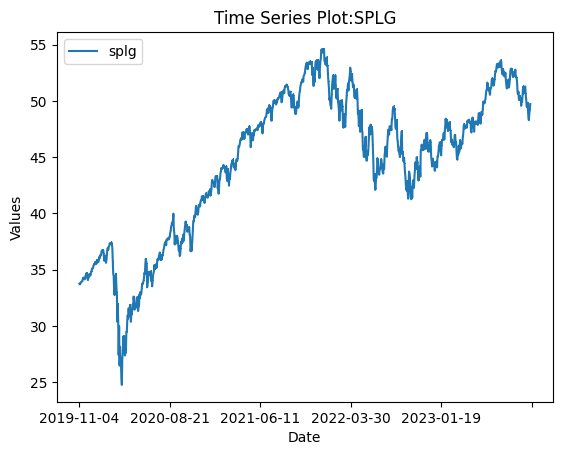

In [ ]:
# Time series plot
etf.plot(x='date', y='splg', marker=',')
plt.title('Time Series Plot:SPLG')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()



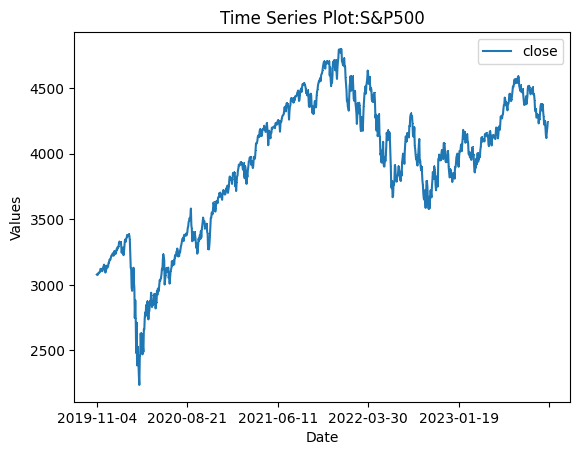

In [ ]:
etf.plot(x='date', y='close', marker=',')
plt.title('Time Series Plot:S&P500')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

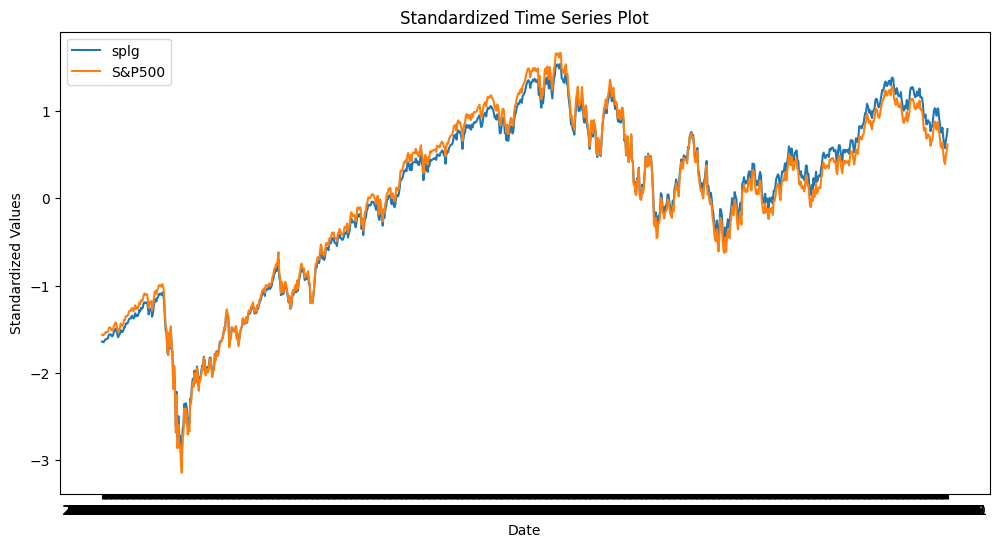

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 'date' is the datetime column, 'splg' is the ETF column, and 'close' is the S&P500 column
time_series_data = etf[['date', 'splg', 'close']].copy()

# Drop rows with missing values for simplicity
time_series_data = time_series_data.dropna()

# Standardize the 'splg' and 'spy' columns
scaler = StandardScaler()
time_series_data[['splg', 'close']] = scaler.fit_transform(time_series_data[['splg', 'close']])

# Plot the standardized time series
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['date'], time_series_data['splg'], label='splg')
plt.plot(time_series_data['date'], time_series_data['close'], label='S&P500')

plt.title('Standardized Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Standardized Values')
plt.legend()
plt.show()


##Correlation Heatmap:

<ipython-input-223-f9508a311259>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = etf.corr()


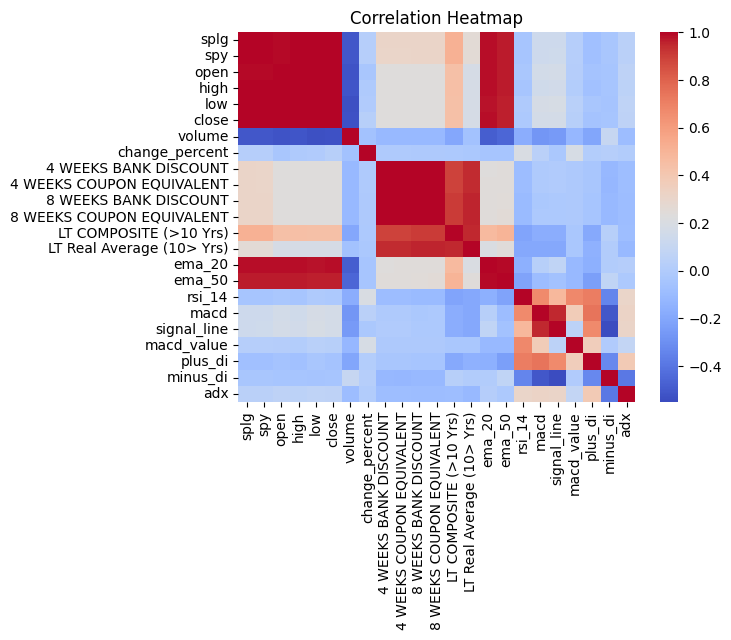

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
correlation_matrix = etf.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
etf.corr()['splg'].sort_values(ascending=False)

<ipython-input-15-4f74eb32c2be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  etf.corr()['splg'].sort_values(ascending=False)


splg                         1.000000
spy                          0.999991
close                        0.995806
high                         0.995166
low                          0.994198
open                         0.993419
ema_20                       0.983472
ema_50                       0.966427
LT COMPOSITE (>10 Yrs)       0.514063
8 WEEKS COUPON EQUIVALENT    0.315111
8 WEEKS BANK DISCOUNT        0.314468
4 WEEKS COUPON EQUIVALENT    0.311081
4 WEEKS BANK DISCOUNT        0.310787
LT Real Average (10> Yrs)    0.260777
signal_line                  0.139879
macd                         0.137711
adx                          0.039943
macd_value                   0.023896
change_percent               0.021419
minus_di                    -0.038527
rsi_14                      -0.043327
plus_di                     -0.075240
volume                      -0.510295
Name: splg, dtype: float64

<ipython-input-58-5472e033dcf8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=etf.corr()['splg'].sort_values(ascending=False).plot(kind='bar')


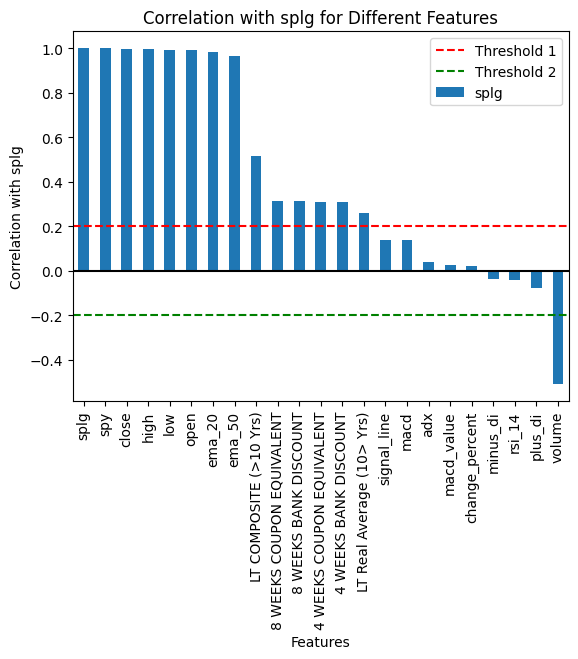

In [ ]:
# Plotting the correlation bar chart
ax=etf.corr()['splg'].sort_values(ascending=False).plot(kind='bar')

# Adding horizontal lines
ax.axhline(y=0.2, color='r', linestyle='--', label='Threshold 1')
ax.axhline(y=0, color='k', linestyle='solid')
ax.axhline(y=-0.2, color='g', linestyle='--', label='Threshold 2')

# Setting labels and title
plt.xlabel('Features')
plt.ylabel('Correlation with splg')
plt.title('Correlation with splg for Different Features')
plt.legend()  # Show legend with labels for horizontal lines

# Show the plot
plt.show()

##Scatter plot

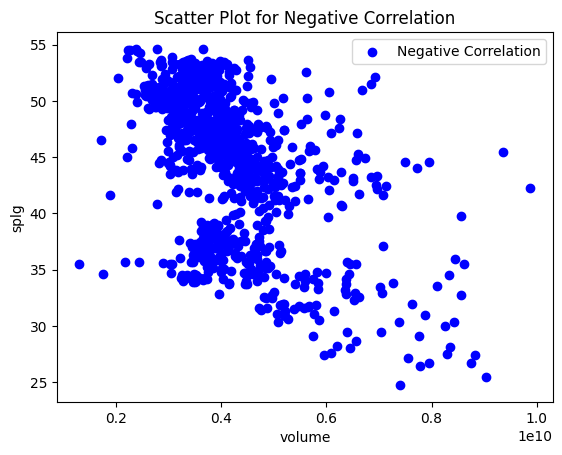

In [ ]:
# Scatter plot for negative correlation
plt.scatter(etf['volume'], etf['splg'], color='blue', label='Negative Correlation')

# Adding labels and title
plt.xlabel('volume')
plt.ylabel('splg')
plt.title('Scatter Plot for Negative Correlation')

# Show the plot
plt.legend()
plt.show()

## Kernel density plot

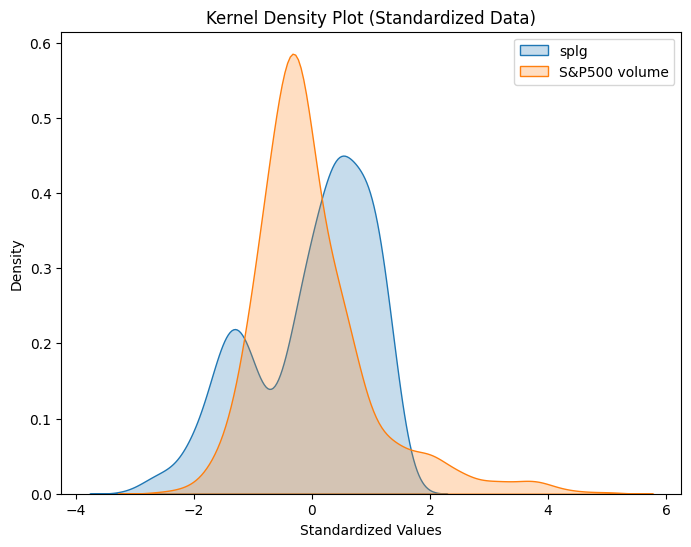

In [ ]:
from sklearn.preprocessing import StandardScaler

scaled_data = etf.copy()

# Standardize the 'splg' and 'spy' columns
scaler = StandardScaler()
scaled_data[['splg', 'spy', 'close', 'volume']] = scaler.fit_transform(scaled_data[['splg', 'spy', 'close', 'volume']])

# Kernel density plot for standardized data
plt.figure(figsize=(8, 6))
sns.kdeplot(scaled_data['splg'], label='splg', fill=True)
sns.kdeplot(scaled_data['volume'], label='S&P500 volume', fill=True)

plt.title('Kernel Density Plot (Standardized Data)')
plt.xlabel('Standardized Values')
plt.ylabel('Density')
plt.legend()
plt.show()

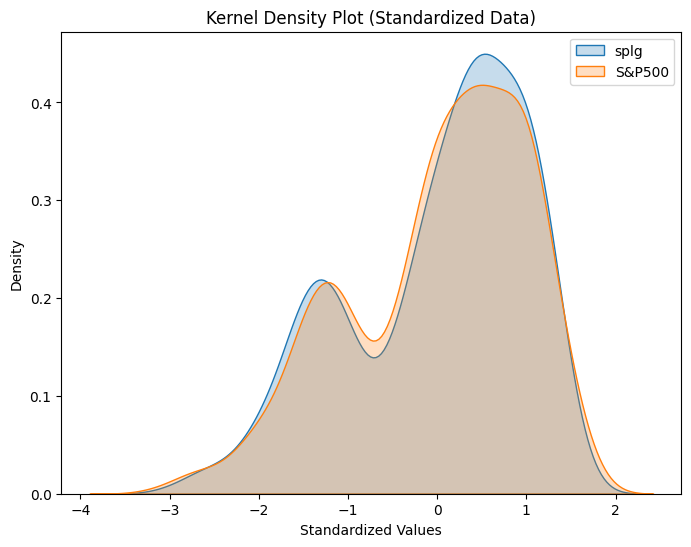

In [ ]:
# Kernel density plot for standardized data
plt.figure(figsize=(8, 6))
sns.kdeplot(time_series_data['splg'], label='splg', fill=True)
sns.kdeplot(time_series_data['close'], label='S&P500', fill=True)

plt.title('Kernel Density Plot (Standardized Data)')
plt.xlabel('Standardized Values')
plt.ylabel('Density')
plt.legend()
plt.show()

# Model building

##Possible Model:

predict price movemnet(up/down):\
logistic regression\
Random Forest\
AdaBoost on decision tree\
Deep Learning\
KNN

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
etf=pd.read_csv('/content/drive/MyDrive/MLFT/data/final_data.csv')

In [ ]:
# Add a new column 'price_direction' based on the comparison of today's and yesterday's prices
#etf['price_direction'] = (etf['splg'] > etf['splg'].shift(1)).astype(int)

# For the first row, set 'price_direction' to 1/0 (1 for increase at today, 0 for decrease)
#etf.loc[etf.index[0], 'price_direction'] = 1

# Reset the index
#etf = etf.reset_index(drop=True)

In [3]:
#Using Current Day and Next Day: 1 if the price increases on the next day and 0 otherwise.
etf['price_direction'] = (etf['splg'] < etf['splg'].shift(-1)).astype(int)

# For the first row, set 'price_direction' to 1/0 (1 for increase at today, 0 for decrease)
etf.loc[etf.index[0], 'price_direction'] = 0

# Reset the index
etf = etf.reset_index(drop=True)

In [4]:
# Reorder the columns as needed
etf = etf[['date', 'splg', 'price_direction', 'spy', 'open', 'high', 'low', 'close', 'volume',
       'change_percent', '4 WEEKS BANK DISCOUNT', '4 WEEKS COUPON EQUIVALENT', '8 WEEKS BANK DISCOUNT',
       '8 WEEKS COUPON EQUIVALENT', 'LT COMPOSITE (>10 Yrs)', 'LT Real Average (10> Yrs)', 'ema_20', 'ema_50', 'rsi_14', 'macd',
       'signal_line', 'macd_value', 'plus_di', 'minus_di', 'adx']]


In [5]:
# Print the updated DataFrame
etf.head()

,date,splg,price_direction,spy,open,high,low,close,volume,change_percent,...,LT Real Average (10> Yrs),ema_20,ema_50,rsi_14,macd,signal_line,macd_value,plus_di,minus_di,adx
0,2019-11-04,33.745369,0,288.3752,3078.9600,3085.2000,3074.8701,3078.2700,4146850000,0.37,...,0.51,3013.900824,2982.969199,75.332848,27.194026,19.732964,7.461062,58.745465,27.764481,333.253362
1,2019-11-05,33.698566,1,288.0562,3080.8000,3083.9500,3072.1499,3074.6201,4486130000,-0.12,...,0.54,3019.683613,2986.563352,76.430045,28.594459,21.505263,7.089196,59.525278,26.778452,331.101640
2,2019-11-06,33.707932,1,288.1219,3075.1001,3078.3401,3065.8899,3076.7800,4458190000,0.07,...,0.50,3025.121364,2990.101260,75.499840,29.538102,23.111831,6.426271,58.929080,26.260939,319.013413
3,2019-11-07,33.829586,1,289.1351,3087.0200,3097.7700,3080.2300,3085.1799,4144640000,0.27,...,0.57,3030.841224,2993.829834,82.727228,30.610884,24.611642,5.999242,56.307478,23.867963,339.454583
4,2019-11-08,33.913815,0,289.8482,3081.2500,3093.0901,3073.5801,3093.0801,3499150000,0.26,...,0.58,3036.768736,2997.722002,81.154505,31.732756,26.035864,5.696891,54.074770,22.202753,340.551354


##logistic regression

All features

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'X' is feature matrix and 'y' is target variable
X = etf.drop(columns=['date','splg','price_direction'])
y = etf['price_direction']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.5466666666666666
Confusion Matrix:
 [[ 51  97]
 [ 39 113]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.34      0.43       148
           1       0.54      0.74      0.62       152

    accuracy                           0.55       300
   macro avg       0.55      0.54      0.53       300
weighted avg       0.55      0.55      0.53       300



In [7]:
# Get the coefficients and feature names
coefficients = logreg_model.coef_[0]
feature_names = X.columns

# Create a DataFrame to display coefficients and feature names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Print or visualize the feature importance
print("Feature Importance in Logistic Regression:")
print(feature_importance_df[['Feature', 'Coefficient']])

Feature Importance in Logistic Regression:
                      Feature  Coefficient
0                         spy     0.302736
1                        open    -0.384160
2                        high    -0.338678
3                         low     0.176102
4                       close    -0.036791
5                      volume    -0.103276
6              change_percent    -0.150015
7       4 WEEKS BANK DISCOUNT    -0.024666
8   4 WEEKS COUPON EQUIVALENT    -0.007624
9       8 WEEKS BANK DISCOUNT     0.272117
10  8 WEEKS COUPON EQUIVALENT     0.306874
11     LT COMPOSITE (>10 Yrs)     0.346806
12  LT Real Average (10> Yrs)    -0.922724
13                     ema_20    -0.170828
14                     ema_50     0.028140
15                     rsi_14    -0.008673
16                       macd     0.053644
17                signal_line     0.062381
18                 macd_value    -0.012953
19                    plus_di    -0.162516
20                   minus_di     0.019726
21         

Only SPY and S&P500 + treasury rates

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'X' is feature matrix and 'y' is target variable
X = etf.drop(columns=['date','splg','price_direction','ema_20', 'ema_50', 'rsi_14', 'macd',
       'signal_line', 'macd_value', 'plus_di', 'minus_di', 'adx'])
y = etf['price_direction']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.5333333333333333
Confusion Matrix:
 [[ 46 102]
 [ 38 114]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.31      0.40       148
           1       0.53      0.75      0.62       152

    accuracy                           0.53       300
   macro avg       0.54      0.53      0.51       300
weighted avg       0.54      0.53      0.51       300



In [9]:
# Get the coefficients and feature names
coefficients = logreg_model.coef_[0]
feature_names = X.columns

# Create a DataFrame to display coefficients and feature names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Print or visualize the feature importance
print("Feature Importance in Logistic Regression:")
print(feature_importance_df[['Feature', 'Coefficient']])

Feature Importance in Logistic Regression:
                      Feature  Coefficient
0                         spy     0.311274
1                        open    -0.417283
2                        high    -0.307750
3                         low     0.095976
4                       close    -0.077379
5                      volume    -0.080888
6              change_percent    -0.145192
7       4 WEEKS BANK DISCOUNT     0.007343
8   4 WEEKS COUPON EQUIVALENT     0.024762
9       8 WEEKS BANK DISCOUNT     0.236622
10  8 WEEKS COUPON EQUIVALENT     0.274374
11     LT COMPOSITE (>10 Yrs)     0.400682
12  LT Real Average (10> Yrs)    -0.970259


Only SPY and S&P500 + technical indicators

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'X' is feature matrix and 'y' is target variable
X = etf.drop(columns=['date','splg','price_direction', '4 WEEKS BANK DISCOUNT', '4 WEEKS COUPON EQUIVALENT', '8 WEEKS BANK DISCOUNT',
       '8 WEEKS COUPON EQUIVALENT', 'LT COMPOSITE (>10 Yrs)', 'LT Real Average (10> Yrs)'])
y = etf['price_direction']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.48
Confusion Matrix:
 [[ 41 107]
 [ 49 103]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.28      0.34       148
           1       0.49      0.68      0.57       152

    accuracy                           0.48       300
   macro avg       0.47      0.48      0.46       300
weighted avg       0.47      0.48      0.46       300



treasury rates + technical indicators

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'X' is feature matrix and 'y' is target variable
X = etf.drop(columns=['date', 'splg', 'price_direction', 'spy', 'open', 'high', 'low', 'close', 'volume',
       'change_percent'])
y = etf['price_direction']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.5133333333333333
Confusion Matrix:
 [[ 46 102]
 [ 44 108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.31      0.39       148
           1       0.51      0.71      0.60       152

    accuracy                           0.51       300
   macro avg       0.51      0.51      0.49       300
weighted avg       0.51      0.51      0.49       300



Only SPY and S&P500

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'X' is feature matrix and 'y' is target variable
X = etf.drop(columns=['date','splg','price_direction', '4 WEEKS BANK DISCOUNT', '4 WEEKS COUPON EQUIVALENT', '8 WEEKS BANK DISCOUNT',
       '8 WEEKS COUPON EQUIVALENT', 'LT COMPOSITE (>10 Yrs)', 'LT Real Average (10> Yrs)', 'ema_20', 'ema_50', 'rsi_14', 'macd',
       'signal_line', 'macd_value', 'plus_di', 'minus_di', 'adx'])
y = etf['price_direction']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.5266666666666666
Confusion Matrix:
 [[ 52  96]
 [ 46 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.35      0.42       148
           1       0.52      0.70      0.60       152

    accuracy                           0.53       300
   macro avg       0.53      0.52      0.51       300
weighted avg       0.53      0.53      0.51       300



In [13]:
# Get the coefficients and feature names
coefficients = logreg_model.coef_[0]
feature_names = X.columns

# Create a DataFrame to display coefficients and feature names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Print or visualize the feature importance
print("Feature Importance in Logistic Regression:")
print(feature_importance_df[['Feature', 'Coefficient']])

Feature Importance in Logistic Regression:
          Feature  Coefficient
0             spy    -0.129504
1            open    -0.259417
2            high    -0.374977
3             low     0.434356
4           close     0.061732
5          volume    -0.094597
6  change_percent    -0.128563


Only treasury rates

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'X' is feature matrix and 'y' is target variable
X = etf.drop(columns=['date', 'splg', 'price_direction', 'spy', 'open', 'high', 'low', 'close', 'volume',
       'change_percent', 'ema_20', 'ema_50', 'rsi_14', 'macd', 'signal_line', 'macd_value', 'plus_di', 'minus_di', 'adx'])
y = etf['price_direction']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.5166666666666667
Confusion Matrix:
 [[ 26 122]
 [ 23 129]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.18      0.26       148
           1       0.51      0.85      0.64       152

    accuracy                           0.52       300
   macro avg       0.52      0.51      0.45       300
weighted avg       0.52      0.52      0.45       300



Only technical indicators

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'X' is feature matrix and 'y' is target variable
X = etf.drop(columns=['date', 'splg', 'price_direction', 'spy', 'open', 'high', 'low', 'close', 'volume',
       'change_percent', '4 WEEKS BANK DISCOUNT', '4 WEEKS COUPON EQUIVALENT', '8 WEEKS BANK DISCOUNT',
       '8 WEEKS COUPON EQUIVALENT', 'LT COMPOSITE (>10 Yrs)', 'LT Real Average (10> Yrs)'])
y = etf['price_direction']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.5066666666666667
Confusion Matrix:
 [[ 44 104]
 [ 44 108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.30      0.37       148
           1       0.51      0.71      0.59       152

    accuracy                           0.51       300
   macro avg       0.50      0.50      0.48       300
weighted avg       0.50      0.51      0.48       300



##Random Forest

All features

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'X' is feature matrix and 'y' is target variable
X = etf.drop(columns=['date','splg','price_direction'])
y = etf['price_direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.6f}")
print("Confusion Matrix:\n", conf_matrix)
print("Random Forest Classification Report:\n", classification_rep)

Accuracy: 0.533333
Confusion Matrix:
 [[71 77]
 [63 89]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.48      0.50       148
           1       0.54      0.59      0.56       152

    accuracy                           0.53       300
   macro avg       0.53      0.53      0.53       300
weighted avg       0.53      0.53      0.53       300



Only SPY and S&P500 + treasury rates

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'X' is feature matrix and 'y' is target variable
X = etf.drop(columns=['date','splg','price_direction','ema_20', 'ema_50', 'rsi_14', 'macd',
       'signal_line', 'macd_value', 'plus_di', 'minus_di', 'adx'])
y = etf['price_direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.6f}")
print("Confusion Matrix:\n", conf_matrix)
print("Random Forest Classification Report:\n", classification_rep)

Accuracy: 0.490000
Confusion Matrix:
 [[65 83]
 [70 82]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.44      0.46       148
           1       0.50      0.54      0.52       152

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.49      0.49      0.49       300



Only SPY and S&P500 + technical indicators

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'X' is feature matrix and 'y' is target variable
X = etf.drop(columns=['date','splg','price_direction', '4 WEEKS BANK DISCOUNT', '4 WEEKS COUPON EQUIVALENT', '8 WEEKS BANK DISCOUNT',
       '8 WEEKS COUPON EQUIVALENT', 'LT COMPOSITE (>10 Yrs)', 'LT Real Average (10> Yrs)'])
y = etf['price_direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.6f}")
print("Confusion Matrix:\n", conf_matrix)
print("Random Forest Classification Report:\n", classification_rep)

Accuracy: 0.553333
Confusion Matrix:
 [[76 72]
 [62 90]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.51      0.53       148
           1       0.56      0.59      0.57       152

    accuracy                           0.55       300
   macro avg       0.55      0.55      0.55       300
weighted avg       0.55      0.55      0.55       300



treasury rates + technical indicators

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'X' is feature matrix and 'y' is target variable
X = etf.drop(columns=['date', 'splg', 'price_direction', 'spy', 'open', 'high', 'low', 'close', 'volume',
       'change_percent'])
y = etf['price_direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.6f}")
print("Confusion Matrix:\n", conf_matrix)
print("Random Forest Classification Report:\n", classification_rep)

Accuracy: 0.560000
Confusion Matrix:
 [[80 68]
 [64 88]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.54      0.55       148
           1       0.56      0.58      0.57       152

    accuracy                           0.56       300
   macro avg       0.56      0.56      0.56       300
weighted avg       0.56      0.56      0.56       300



In [35]:
# Access the feature importances
feature_importances = rf_classifier.feature_importances_

# Access the individual decision trees in the forest
individual_trees = rf_classifier.estimators_

# Access the number of trees in the forest
num_trees = len(rf_classifier.estimators_)

# Print the feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

# Print the first decision tree in the forest
print("\nFirst Decision Tree:")
print(individual_trees[0])

# Print the number of trees in the forest
print("\nNumber of Trees:", num_trees)


Feature Importances:
4 WEEKS BANK DISCOUNT: 0.0448
4 WEEKS COUPON EQUIVALENT: 0.0389
8 WEEKS BANK DISCOUNT: 0.0410
8 WEEKS COUPON EQUIVALENT: 0.0355
LT COMPOSITE (>10 Yrs): 0.0722
LT Real Average (10> Yrs): 0.0664
ema_20: 0.0785
ema_50: 0.0732
rsi_14: 0.1068
macd: 0.0691
signal_line: 0.0705
macd_value: 0.0725
plus_di: 0.0780
minus_di: 0.0770
adx: 0.0754

First Decision Tree:
DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

Number of Trees: 50


Only SPY and S&P500

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'X' is feature matrix and 'y' is target variable
X = etf.drop(columns=['date','splg','price_direction', '4 WEEKS BANK DISCOUNT', '4 WEEKS COUPON EQUIVALENT', '8 WEEKS BANK DISCOUNT',
       '8 WEEKS COUPON EQUIVALENT', 'LT COMPOSITE (>10 Yrs)', 'LT Real Average (10> Yrs)', 'ema_20', 'ema_50', 'rsi_14', 'macd',
       'signal_line', 'macd_value', 'plus_di', 'minus_di', 'adx'])
y = etf['price_direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.6f}")
print("Confusion Matrix:\n", conf_matrix)
print("Random Forest Classification Report:\n", classification_rep)

Accuracy: 0.480000
Confusion Matrix:
 [[67 81]
 [75 77]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.45      0.46       148
           1       0.49      0.51      0.50       152

    accuracy                           0.48       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.48      0.48      0.48       300



Only treasury rates

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'X' is feature matrix and 'y' is target variable
X = etf.drop(columns=['date', 'splg', 'price_direction', 'spy', 'open', 'high', 'low', 'close', 'volume',
       'change_percent', 'ema_20', 'ema_50', 'rsi_14', 'macd', 'signal_line', 'macd_value', 'plus_di', 'minus_di', 'adx'])
y = etf['price_direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.6f}")
print("Confusion Matrix:\n", conf_matrix)
print("Random Forest Classification Report:\n", classification_rep)

Accuracy: 0.536667
Confusion Matrix:
 [[72 76]
 [63 89]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.49      0.51       148
           1       0.54      0.59      0.56       152

    accuracy                           0.54       300
   macro avg       0.54      0.54      0.54       300
weighted avg       0.54      0.54      0.54       300



Only technical indicators

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'X' is feature matrix and 'y' is target variable
X = etf.drop(columns=['date', 'splg', 'price_direction', 'spy', 'open', 'high', 'low', 'close', 'volume',
       'change_percent', '4 WEEKS BANK DISCOUNT', '4 WEEKS COUPON EQUIVALENT', '8 WEEKS BANK DISCOUNT',
       '8 WEEKS COUPON EQUIVALENT', 'LT COMPOSITE (>10 Yrs)', 'LT Real Average (10> Yrs)'])
y = etf['price_direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.6f}")
print("Confusion Matrix:\n", conf_matrix)
print("Random Forest Classification Report:\n", classification_rep)

Accuracy: 0.513333
Confusion Matrix:
 [[65 83]
 [63 89]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.44      0.47       148
           1       0.52      0.59      0.55       152

    accuracy                           0.51       300
   macro avg       0.51      0.51      0.51       300
weighted avg       0.51      0.51      0.51       300



##AdaBoost

All features

In [39]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'X' is feature matrix and 'y' is target variable
X = etf.drop(columns=['date','splg','price_direction'])
y = etf['price_direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the classifier on the training data
adaboost_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = adaboost_classifier.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.6f}")
print("Confusion Matrix:\n", conf_matrix)
print("AdaBoost Classification Report:\n", classification_rep)

Accuracy: 0.546667
Confusion Matrix:
 [[ 62  86]
 [ 50 102]]
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.42      0.48       148
           1       0.54      0.67      0.60       152

    accuracy                           0.55       300
   macro avg       0.55      0.54      0.54       300
weighted avg       0.55      0.55      0.54       300



Only SPY and S&P500 + treasury rates

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'X' is feature matrix and 'y' is target variable
X = etf.drop(columns=['date','splg','price_direction','ema_20', 'ema_50', 'rsi_14', 'macd',
       'signal_line', 'macd_value', 'plus_di', 'minus_di', 'adx'])
y = etf['price_direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the classifier on the training data
adaboost_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = adaboost_classifier.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.6f}")
print("Confusion Matrix:\n", conf_matrix)
print("AdaBoost Classification Report:\n", classification_rep)

Accuracy: 0.526667
Confusion Matrix:
 [[ 53  95]
 [ 47 105]]
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.36      0.43       148
           1       0.53      0.69      0.60       152

    accuracy                           0.53       300
   macro avg       0.53      0.52      0.51       300
weighted avg       0.53      0.53      0.51       300



Only SPY and S&P500 + technical indicators

In [41]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'X' is feature matrix and 'y' is target variable
X = etf.drop(columns=['date','splg','price_direction', '4 WEEKS BANK DISCOUNT', '4 WEEKS COUPON EQUIVALENT', '8 WEEKS BANK DISCOUNT',
       '8 WEEKS COUPON EQUIVALENT', 'LT COMPOSITE (>10 Yrs)', 'LT Real Average (10> Yrs)'])
y = etf['price_direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the classifier on the training data
adaboost_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = adaboost_classifier.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.6f}")
print("Confusion Matrix:\n", conf_matrix)
print("AdaBoost Classification Report:\n", classification_rep)

Accuracy: 0.530000
Confusion Matrix:
 [[62 86]
 [55 97]]
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.42      0.47       148
           1       0.53      0.64      0.58       152

    accuracy                           0.53       300
   macro avg       0.53      0.53      0.52       300
weighted avg       0.53      0.53      0.52       300



treasury rates + technical indicators

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'X' is feature matrix and 'y' is target variable
X = etf.drop(columns=['date', 'splg', 'price_direction', 'spy', 'open', 'high', 'low', 'close', 'volume',
       'change_percent'])
y = etf['price_direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the classifier on the training data
adaboost_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = adaboost_classifier.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.6f}")
print("Confusion Matrix:\n", conf_matrix)
print("AdaBoost Classification Report:\n", classification_rep)

Accuracy: 0.530000
Confusion Matrix:
 [[64 84]
 [57 95]]
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.43      0.48       148
           1       0.53      0.62      0.57       152

    accuracy                           0.53       300
   macro avg       0.53      0.53      0.52       300
weighted avg       0.53      0.53      0.53       300



Only SPY and S&P500

In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'X' is feature matrix and 'y' is target variable
X = etf.drop(columns=['date','splg','price_direction', '4 WEEKS BANK DISCOUNT', '4 WEEKS COUPON EQUIVALENT', '8 WEEKS BANK DISCOUNT',
       '8 WEEKS COUPON EQUIVALENT', 'LT COMPOSITE (>10 Yrs)', 'LT Real Average (10> Yrs)', 'ema_20', 'ema_50', 'rsi_14', 'macd',
       'signal_line', 'macd_value', 'plus_di', 'minus_di', 'adx'])
y = etf['price_direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the classifier on the training data
adaboost_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = adaboost_classifier.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.6f}")
print("Confusion Matrix:\n", conf_matrix)
print("AdaBoost Classification Report:\n", classification_rep)

Accuracy: 0.490000
Confusion Matrix:
 [[58 90]
 [63 89]]
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.39      0.43       148
           1       0.50      0.59      0.54       152

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.48       300
weighted avg       0.49      0.49      0.49       300



Only treasury rates

In [44]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'X' is feature matrix and 'y' is target variable
X = etf.drop(columns=['date', 'splg', 'price_direction', 'spy', 'open', 'high', 'low', 'close', 'volume',
       'change_percent', 'ema_20', 'ema_50', 'rsi_14', 'macd', 'signal_line', 'macd_value', 'plus_di', 'minus_di', 'adx'])
y = etf['price_direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the classifier on the training data
adaboost_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = adaboost_classifier.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.6f}")
print("Confusion Matrix:\n", conf_matrix)
print("AdaBoost Classification Report:\n", classification_rep)

Accuracy: 0.520000
Confusion Matrix:
 [[ 52  96]
 [ 48 104]]
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.35      0.42       148
           1       0.52      0.68      0.59       152

    accuracy                           0.52       300
   macro avg       0.52      0.52      0.51       300
weighted avg       0.52      0.52      0.51       300



Only technical indicators

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'X' is feature matrix and 'y' is target variable
X = etf.drop(columns=['date', 'splg', 'price_direction', 'spy', 'open', 'high', 'low', 'close', 'volume',
       'change_percent', '4 WEEKS BANK DISCOUNT', '4 WEEKS COUPON EQUIVALENT', '8 WEEKS BANK DISCOUNT',
       '8 WEEKS COUPON EQUIVALENT', 'LT COMPOSITE (>10 Yrs)', 'LT Real Average (10> Yrs)'])
y = etf['price_direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the classifier on the training data
adaboost_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = adaboost_classifier.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.6f}")
print("Confusion Matrix:\n", conf_matrix)
print("AdaBoost Classification Report:\n", classification_rep)

Accuracy: 0.503333
Confusion Matrix:
 [[56 92]
 [57 95]]
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.38      0.43       148
           1       0.51      0.62      0.56       152

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.49       300
weighted avg       0.50      0.50      0.50       300



#Cross-Validation

##Chose best Logistic Regression and perform Cross-Validation: feature1

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'X' is feature matrix and 'y' is target variable
X = etf.drop(columns=['date','splg','price_direction'])
y = etf['price_direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Perform 10-fold cross-validation
cv_scores_logreg = cross_val_score(logreg_model, X, y, cv=10, scoring='accuracy')

# Train the logistic regression model on the training data
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = logreg_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the performance of the logistic regression model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

# Print the average accuracy from cross-validation
print("Average Accuracy (Cross-Validation):", cv_scores_logreg.mean())

Accuracy: 0.5466666666666666
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.34      0.43       148
           1       0.54      0.74      0.62       152

    accuracy                           0.55       300
   macro avg       0.55      0.54      0.53       300
weighted avg       0.55      0.55      0.53       300

Average Accuracy (Cross-Validation): 0.5300606060606061


##Chose best Random Forest and perform Cross-Validation: feature4

In [50]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'X' is feature matrix and 'y' is target variable
X = etf.drop(columns=['date', 'splg', 'price_direction', 'spy', 'open', 'high', 'low', 'close', 'volume',
       'change_percent'])
y = etf['price_direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Perform 10-fold cross-validation
cv_scores_rf = cross_val_score(rf_classifier, X, y, cv=10, scoring='accuracy')

# Train the random forest model on the training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.6f}")
print("Confusion Matrix:\n", conf_matrix)
print("Random Forest Classification Report:\n", classification_rep)

# Print the average accuracy from cross-validation
print("Average Accuracy (Cross-Validation):", cv_scores_rf.mean())

Accuracy: 0.560000
Confusion Matrix:
 [[80 68]
 [64 88]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.54      0.55       148
           1       0.56      0.58      0.57       152

    accuracy                           0.56       300
   macro avg       0.56      0.56      0.56       300
weighted avg       0.56      0.56      0.56       300

Average Accuracy (Cross-Validation): 0.2928383838383838


##Chose best AdaBoost and perform Cross-Validation:

In [51]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'X' is feature matrix and 'y' is target variable
X = etf.drop(columns=['date','splg','price_direction'])
y = etf['price_direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Perform 10-fold cross-validation
cv_scores_Ada = cross_val_score(adaboost_classifier, X, y, cv=10, scoring='accuracy')

# Train the classifier on the training data
adaboost_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = adaboost_classifier.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.6f}")
print("Confusion Matrix:\n", conf_matrix)
print("AdaBoost Classification Report:\n", classification_rep)

# Print the average accuracy from cross-validation
print("Average Accuracy (Cross-Validation):", cv_scores_Ada.mean())

Accuracy: 0.546667
Confusion Matrix:
 [[ 62  86]
 [ 50 102]]
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.42      0.48       148
           1       0.54      0.67      0.60       152

    accuracy                           0.55       300
   macro avg       0.55      0.54      0.54       300
weighted avg       0.55      0.55      0.54       300

Average Accuracy (Cross-Validation): 0.37392929292929294


##explanations/ observations

When you observe a drop in the average accuracy of cross-validation for the logistic regression model compared to its accuracy on the test set, it suggests that the model might not be as robust as initially thought. Here are a few considerations and possible explanations for this discrepancy:

1. **Dataset Characteristics:**
   - Logistic regression assumes a linear relationship between the features and the target variable. If the relationship is more complex or non-linear, logistic regression may struggle to capture it effectively, leading to lower cross-validated scores.

2. **Overfitting on the Training Set:**
   - Logistic regression may have overfitted the training set, achieving high accuracy on it but failing to generalize well to unseen data. Cross-validation provides a more realistic estimate of how well the model generalizes.

3. **Feature Importance:**
   - Random Forest inherently captures non-linear relationships and interactions between features, making it more flexible. If there are important non-linearities in the data, Random Forest might perform better.

4. **Model Complexity:**
   - Logistic regression is a simpler model compared to Random Forest. If the relationships in the data are complex, a more complex model like Random Forest may be better suited.

5. **Class Imbalance:**
   - Check for class imbalance and its impact on model performance. Logistic regression may be more sensitive to imbalanced classes.

To further investigate, you can explore the individual fold scores from cross-validation, examine the confusion matrix, and consider other evaluation metrics beyond accuracy (e.g., precision, recall, F1-score). Additionally, tuning hyperparameters or exploring other classification models may help improve the performance of logistic regression on your specific dataset.

The discrepancy between the average accuracy of cross-validation and the accuracy on the test set could be attributed to several factors. Here are some general considerations and possible explanations:

1. **Data Splitting Variability:**
   - Cross-validation involves splitting the dataset into multiple folds. The randomness in how the data is split can introduce variability.
   - The test set in the train-test split might be particularly favorable or unfavorable, affecting the test accuracy.

2. **Limited Data Size:**
   - If the dataset is relatively small, the train-test split might not provide a representative sample of the overall data distribution.
   - Cross-validation aims to address this by repeatedly splitting the data, providing a more comprehensive assessment.

3. **Model Sensitivity:**
   - Some machine learning models are sensitive to the specific subset of data they are trained on. The train-test split might capture a specific pattern that is not well-represented in other splits.

4. **Hyperparameter Tuning:**
   - During cross-validation, if hyperparameter tuning is performed on each fold independently, it might lead to overfitting on the validation sets, resulting in a lower average accuracy.

5. **Feature Variability:**
   - Cross-validation might encounter different subsets of features in each fold, and this variability can impact model performance.

6. **Imbalanced Classes:**
   - If the classes in the dataset are imbalanced, the randomness in splitting can lead to some folds having disproportionately fewer instances of a particular class, affecting the evaluation.

7. **Data Drift:**
   - If there is temporal or distributional drift in the data, the train-test split might capture a different distribution than the cross-validation folds.

To investigate the discrepancy further, you can:
   - Analyze the distribution of classes in each fold of the cross-validation.
   - Review the hyperparameter tuning process during cross-validation.
   - Explore feature variability across folds.
   - Consider alternative evaluation metrics, especially if dealing with imbalanced classes.
   - Evaluate on a larger or more diverse dataset if possible.

It's essential to interpret both cross-validation results and the test set accuracy cautiously and consider the potential sources of variability and bias in each evaluation method.

###XGboost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'X' is feature matrix and 'y' is target variable
X = etf.drop(columns=['date','splg','price_direction','ema_20', 'ema_50', 'rsi_14', 'macd',
       'signal_line', 'macd_value', 'plus_di', 'minus_di', 'adx'])
y = etf['price_direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss", use_label_encoder=False, random_state=42)

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.6f}")
print("Confusion Matrix:\n", conf_matrix)
print("XGBoost Classification Report:\n", classification_rep)

Accuracy: 0.970000
Confusion Matrix:
 [[146   6]
 [  3 145]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       152
           1       0.96      0.98      0.97       148

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



###NN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


#'X' is feature matrix and 'y' is target variable
X = etf.drop(columns=['date','splg','price_direction','ema_20', 'ema_50', 'rsi_14', 'macd',
       'signal_line', 'macd_value', 'plus_di', 'minus_di', 'adx'])
y = etf['price_direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a basic neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the testing data
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)

# Evaluate the performance of the neural network model
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))
print("Accuracy:", accuracy_score(y_test, y_pred_nn))


Epoch 1/10
18/18 [==============================] - 2s 29ms/step - loss: 94656880.0000 - accuracy: 0.4946 - val_loss: 21981446.0000 - val_accuracy: 0.4571
Epoch 2/10
18/18 [==============================] - 0s 7ms/step - loss: 15316578.0000 - accuracy: 0.5125 - val_loss: 9036318.0000 - val_accuracy: 0.4571
Epoch 3/10
18/18 [==============================] - 0s 4ms/step - loss: 3784016.5000 - accuracy: 0.5341 - val_loss: 1871093.0000 - val_accuracy: 0.4571
Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 1358205.7500 - accuracy: 0.4803 - val_loss: 2361637.5000 - val_accuracy: 0.5429
Epoch 5/10
18/18 [==============================] - 0s 5ms/step - loss: 2954324.5000 - accuracy: 0.5090 - val_loss: 2778753.5000 - val_accuracy: 0.4571
Epoch 6/10
18/18 [==============================] - 0s 5ms/step - loss: 3962411.2500 - accuracy: 0.4946 - val_loss: 4272531.0000 - val_accuracy: 0.4571
Epoch 7/10
18/18 [==============================] - 0s 5ms/step - loss: 2210640.2500

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Lasso

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming 'X' is your feature matrix and 'y' is your target variable
# X should be a DataFrame with your features, and y should be a Series with the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Lasso regression model
lasso_model = Lasso(alpha=0.01)  # You can adjust the alpha parameter for regularization strength

# Train the model on the training data
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = lasso_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the coefficients of the model
coefficients = pd.Series(lasso_model.coef_, index=X.columns)
print('Lasso Coefficients:')
print(coefficients[coefficients != 0])  # Display non-zero coefficients


Mean Squared Error: 0.0006534236947907993
Lasso Coefficients:
spy                       6.587855
LT COMPOSITE (>10 Yrs)    0.012849
ema_20                    0.001221
ema_50                    0.011614
dtype: float64


In [ ]:
pip install prophet

In [ ]:
import pandas as pd
from fbprophet import Prophet

# Sample DataFrame with S&P500 and SPY prices as features
df = pd.DataFrame({
    'date': pd.date_range('2022-01-01', '2023-01-01', freq='D'),
    'y': [i for i in range(366)],  # Your target variable
    'sp500_price': [price + 5 for price in range(366)],  # Example additional feature (S&P500)
    'spy_price': [price - 2 for price in range(366)],  # Example additional feature (SPY)
})

# Rename columns to match Prophet's expected format
df = df.rename(columns={'date': 'ds', 'y': 'y', 'sp500_price': 'sp500', 'spy_price': 'spy'})

# Initialize and fit the model with additional regressors
model = Prophet()
model.add_regressor('sp500')
model.add_regressor('spy')

model.fit(df)

# Create a DataFrame for future dates
future = model.make_future_dataframe(periods=365)

# Add values for the additional regressors in the future DataFrame
future['sp500'] = [price + 5 for price in range(366, 731)]  # Example for S&P500
future['spy'] = [price - 2 for price in range(366, 731)]  # Example for SPY

# Make predictions
forecast = model.predict(future)

# Visualize the results
fig = model.plot(forecast)


subset selection

in-sample and out-sample for
movement predict/ price predict -> return for long and hold, short and wait(1day, 5days, 21days)

table to show

30% of data as test set for in sample\
1d/1w/1m future data for out sample

#return

##Recall the best model with cv_score to generate predicted labels

In [52]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'X' is feature matrix and 'y' is target variable
X = etf.drop(columns=['date','splg','price_direction'])
y = etf['price_direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Perform 10-fold cross-validation
cv_scores_logreg = cross_val_score(logreg_model, X, y, cv=10, scoring='accuracy')

# Train the logistic regression model on the training data
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = logreg_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the performance of the logistic regression model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

# Print the average accuracy from cross-validation
print("Average Accuracy (Cross-Validation):", cv_scores_logreg.mean())

Accuracy: 0.5466666666666666
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.34      0.43       148
           1       0.54      0.74      0.62       152

    accuracy                           0.55       300
   macro avg       0.55      0.54      0.53       300
weighted avg       0.55      0.55      0.53       300

Average Accuracy (Cross-Validation): 0.5300606060606061


##Execute buy/sell only when there is a change in direction

###90 days

In [66]:
import pandas as pd

# Use the 'tail' method to select the last n rows
Xfor_pred = X.tail(90).copy()
yfor_pred = y.tail(90).copy()
splg30d = etf['splg'].tail(90).copy()
date_pred = etf['date'].tail(90).copy()

# Make predictions on the testing data
new_y_pred = adaboost_classifier.predict(Xfor_pred)

predicted_data = pd.DataFrame()
predicted_data['date'] = date_pred
predicted_data['price'] = splg30d
predicted_data['True_Labels'] = yfor_pred
predicted_data['predicted_labels'] = new_y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


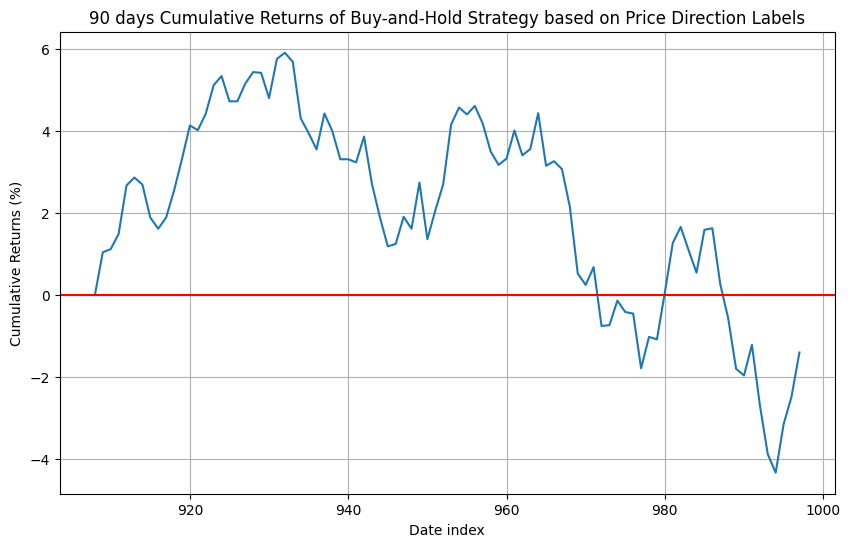

Max Cumulative Returns%:
 5.912780363654036
Min Cumulative Returns%:
 -4.3323408711213975
Average Daily Returns%:
 -0.015551017844626338
Average Cumulative Returns%:
 2.0677014549450226
Last Day Cumulative Returns%:
 -1.3995916060163696


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'price_direction_labels' is a pandas Series with labels (1 or 0)
# Assuming 'price_data' is a pandas DataFrame with historical price data

# Initialize variables
initial_portfolio_value = 100000  # Initial investment amount
portfolio_value = initial_portfolio_value
shares_held = 0

# Create a DataFrame to store signals and returns
signals_and_returns = pd.DataFrame(index=predicted_data.index)
signals_and_returns['Price_Direction'] = predicted_data['predicted_labels']
signals_and_returns['Price'] = predicted_data['price']

# Backtesting loop with directional changes
for i in range(1, len(signals_and_returns)):
    current_direction = signals_and_returns['Price_Direction'].iloc[i]
    previous_direction = signals_and_returns['Price_Direction'].iloc[i - 1]

    # Execute buy/sell only when there is a change in direction
    if current_direction != previous_direction:
        if current_direction == 0:  # Buy
            shares_bought = portfolio_value // signals_and_returns['Price'].iloc[i]
            shares_held += shares_bought
            portfolio_value -= shares_bought * signals_and_returns['Price'].iloc[i]
        elif current_direction == 1:  # Sell
            portfolio_value += shares_held * signals_and_returns['Price'].iloc[i]
            shares_held = 0

# Calculate returns in percentage
signals_and_returns['Shares_Held'] = shares_held
signals_and_returns['Portfolio_Value'] = portfolio_value + shares_held * signals_and_returns['Price']
signals_and_returns['Returns'] = (signals_and_returns['Portfolio_Value'].pct_change() * 100).fillna(0)
signals_and_returns['Cumulative_Returns'] = signals_and_returns['Returns'].cumsum()

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(signals_and_returns['Cumulative_Returns'])
plt.axhline(y=0, xmin=0, xmax=1,color="red")
plt.title('90 days Cumulative Returns of Buy-and-Hold Strategy based on Price Direction Labels')
plt.xlabel('Date index')
plt.ylabel('Cumulative Returns (%)')
plt.grid()
plt.show()

print("Max Cumulative Returns%:\n", max(signals_and_returns['Cumulative_Returns']))
print("Min Cumulative Returns%:\n", min(signals_and_returns['Cumulative_Returns']))
print("Average Daily Returns%:\n", np.mean(signals_and_returns['Returns']))
print("Average Cumulative Returns%:\n", np.mean(signals_and_returns['Cumulative_Returns']))
print("Last Day Cumulative Returns%:\n", signals_and_returns['Cumulative_Returns'].iloc[-1])

####Sharpe ratio
Daily Treasury Bill Rates at 11/01/2023\
13 WEEKS BANK DISCOUNT:5.31%

In [68]:
# Assuming 'returns' is a pandas Series of daily returns
returns = signals_and_returns['Returns']

# Risk-free rate (e.g., the yield on a government bond)
risk_free_rate = 0.0531  # Replace with the actual risk-free rate

# Calculate average return and standard deviation of returns
average_return = returns.mean()
volatility = returns.std()

# Calculate Sharpe ratio
sharpe_ratio = (average_return - risk_free_rate) / volatility

print("Average Return:", average_return)
print("Volatility:", volatility)
print("Sharpe Ratio:", sharpe_ratio)


Average Return: -0.015551017844626338
Volatility: 0.7511581697904157
Sharpe Ratio: -0.09139355811543791


####Sortino ratio

In [69]:
import numpy as np

def sortino_ratio(returns, target_return=0):
    downside_returns = np.minimum(returns - target_return, 0)
    downside_deviation = np.std(downside_returns, ddof=0)

    if downside_deviation == 0:
        return np.nan  # Avoid division by zero if there is no downside deviation

    sortino_ratio = (np.mean(returns) - target_return) / downside_deviation
    return sortino_ratio

target_return = 0.05  # Replace with your desired target return
sortino = sortino_ratio(returns, target_return)
print(f'Sortino Ratio: {sortino:.4f}')


Sortino Ratio: -0.1375


###180 days

In [70]:
import pandas as pd

# Use the 'tail' method to select the last n rows
Xfor_pred = X.tail(180).copy()
yfor_pred = y.tail(180).copy()
splg30d = etf['splg'].tail(180).copy()
date_pred = etf['date'].tail(180).copy()

# Make predictions on the testing data
new_y_pred = adaboost_classifier.predict(Xfor_pred)

predicted_data = pd.DataFrame()
predicted_data['date'] = date_pred
predicted_data['price'] = splg30d
predicted_data['True_Labels'] = yfor_pred
predicted_data['predicted_labels'] = new_y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


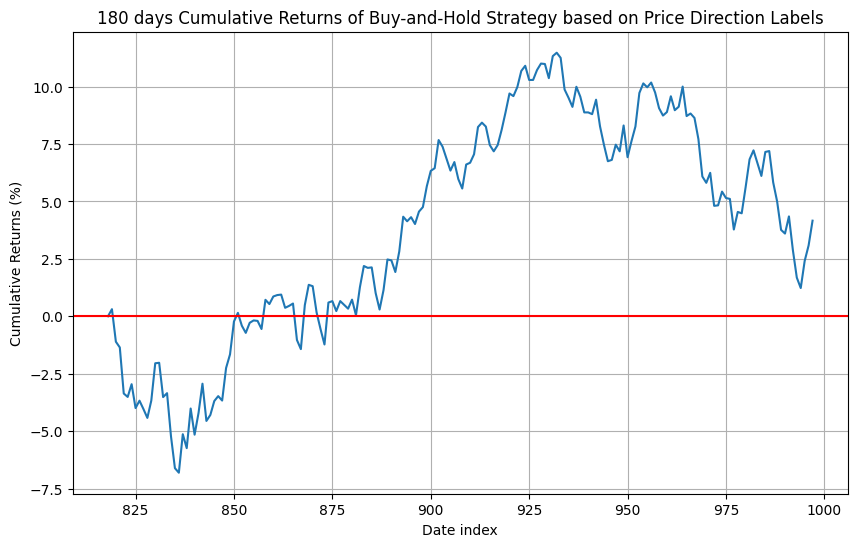

Max Cumulative Returns%:
 11.473957992747291
Min Cumulative Returns%:
 -6.811354828546446
Average Daily Returns%:
 0.0231211598442151
Average Cumulative Returns%:
 3.808135527787115
Last Day Cumulative Returns%:
 4.161808771958711


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'price_direction_labels' is a pandas Series with labels (1 or 0)
# Assuming 'price_data' is a pandas DataFrame with historical price data

# Initialize variables
initial_portfolio_value = 100000  # Initial investment amount
portfolio_value = initial_portfolio_value
shares_held = 0

# Create a DataFrame to store signals and returns
signals_and_returns = pd.DataFrame(index=predicted_data.index)
signals_and_returns['Price_Direction'] = predicted_data['predicted_labels']
signals_and_returns['Price'] = predicted_data['price']

# Backtesting loop with directional changes
for i in range(1, len(signals_and_returns)):
    current_direction = signals_and_returns['Price_Direction'].iloc[i]
    previous_direction = signals_and_returns['Price_Direction'].iloc[i - 1]

    # Execute buy/sell only when there is a change in direction
    if current_direction != previous_direction:
        if current_direction == 0:  # Buy
            shares_bought = portfolio_value // signals_and_returns['Price'].iloc[i]
            shares_held += shares_bought
            portfolio_value -= shares_bought * signals_and_returns['Price'].iloc[i]
        elif current_direction == 1:  # Sell
            portfolio_value += shares_held * signals_and_returns['Price'].iloc[i]
            shares_held = 0

# Calculate returns in percentage
signals_and_returns['Shares_Held'] = shares_held
signals_and_returns['Portfolio_Value'] = portfolio_value + shares_held * signals_and_returns['Price']
signals_and_returns['Returns'] = (signals_and_returns['Portfolio_Value'].pct_change() * 100).fillna(0)
signals_and_returns['Cumulative_Returns'] = signals_and_returns['Returns'].cumsum()

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(signals_and_returns['Cumulative_Returns'])
plt.axhline(y=0, xmin=0, xmax=1,color="red")
plt.title('180 days Cumulative Returns of Buy-and-Hold Strategy based on Price Direction Labels')
plt.xlabel('Date index')
plt.ylabel('Cumulative Returns (%)')
plt.grid()
plt.show()

print("Max Cumulative Returns%:\n", max(signals_and_returns['Cumulative_Returns']))
print("Min Cumulative Returns%:\n", min(signals_and_returns['Cumulative_Returns']))
print("Average Daily Returns%:\n", np.mean(signals_and_returns['Returns']))
print("Average Cumulative Returns%:\n", np.mean(signals_and_returns['Cumulative_Returns']))
print("Last Day Cumulative Returns%:\n", signals_and_returns['Cumulative_Returns'].iloc[-1])

####Sharpe ratio
Daily Treasury Bill Rates at 11/01/2023\
26 WEEKS BANK DISCOUNT:5.3%

In [72]:
# Assuming 'returns' is a pandas Series of daily returns
returns = signals_and_returns['Returns']

# Risk-free rate (e.g., the yield on a government bond)
risk_free_rate = 0.053  # Replace with the actual risk-free rate

# Calculate average return and standard deviation of returns
average_return = returns.mean()
volatility = returns.std()

# Calculate Sharpe ratio
sharpe_ratio = (average_return - risk_free_rate) / volatility

print("Average Return:", average_return)
print("Volatility:", volatility)
print("Sharpe Ratio:", sharpe_ratio)


Average Return: 0.0231211598442151
Volatility: 0.812254965033174
Sharpe Ratio: -0.036785050805524584


In [73]:
import numpy as np

def sortino_ratio(returns, target_return=0):
    downside_returns = np.minimum(returns - target_return, 0)
    downside_deviation = np.std(downside_returns, ddof=0)

    if downside_deviation == 0:
        return np.nan  # Avoid division by zero if there is no downside deviation

    sortino_ratio = (np.mean(returns) - target_return) / downside_deviation
    return sortino_ratio

target_return = 0.05  # Replace with your desired target return
sortino = sortino_ratio(returns, target_return)
print(f'Sortino Ratio: {sortino:.4f}')


Sortino Ratio: -0.0550


###360 days

In [74]:
import pandas as pd

# Use the 'tail' method to select the last n rows
Xfor_pred = X.tail(360).copy()
yfor_pred = y.tail(360).copy()
splg30d = etf['splg'].tail(360).copy()
date_pred = etf['date'].tail(360).copy()

# Make predictions on the testing data
new_y_pred = adaboost_classifier.predict(Xfor_pred)

predicted_data = pd.DataFrame()
predicted_data['date'] = date_pred
predicted_data['price'] = splg30d
predicted_data['True_Labels'] = yfor_pred
predicted_data['predicted_labels'] = new_y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


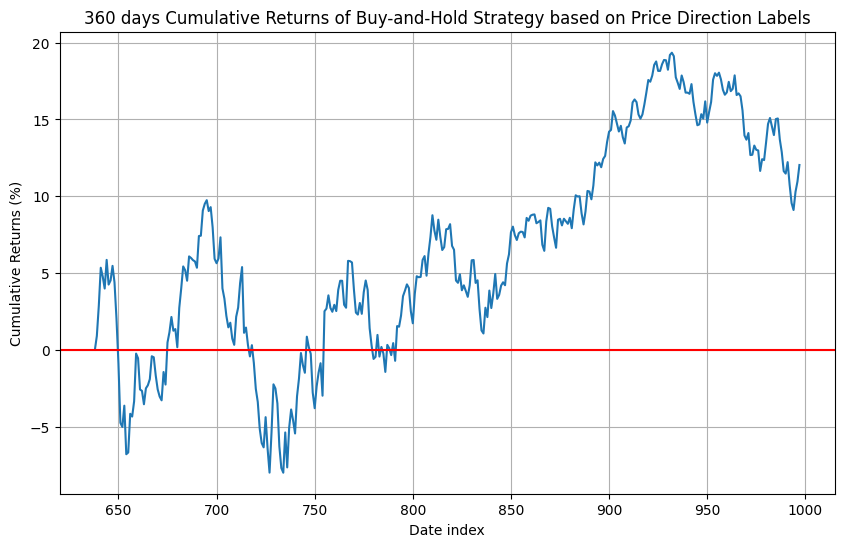

Max Cumulative Returns%:
 19.346248967424607
Min Cumulative Returns%:
 -8.000618991356456
Average Daily Returns%:
 0.03343259249400222
Average Cumulative Returns%:
 6.5062254835147035
Last Day Cumulative Returns%:
 12.0357332978408


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'price_direction_labels' is a pandas Series with labels (1 or 0)
# Assuming 'price_data' is a pandas DataFrame with historical price data

# Initialize variables
initial_portfolio_value = 100000  # Initial investment amount
portfolio_value = initial_portfolio_value
shares_held = 0

# Create a DataFrame to store signals and returns
signals_and_returns = pd.DataFrame(index=predicted_data.index)
signals_and_returns['Price_Direction'] = predicted_data['predicted_labels']
signals_and_returns['Price'] = predicted_data['price']

# Backtesting loop with directional changes
for i in range(1, len(signals_and_returns)):
    current_direction = signals_and_returns['Price_Direction'].iloc[i]
    previous_direction = signals_and_returns['Price_Direction'].iloc[i - 1]

    # Execute buy/sell only when there is a change in direction
    if current_direction != previous_direction:
        if current_direction == 0:  # Buy
            shares_bought = portfolio_value // signals_and_returns['Price'].iloc[i]
            shares_held += shares_bought
            portfolio_value -= shares_bought * signals_and_returns['Price'].iloc[i]
        elif current_direction == 1:  # Sell
            portfolio_value += shares_held * signals_and_returns['Price'].iloc[i]
            shares_held = 0

# Calculate returns in percentage
signals_and_returns['Shares_Held'] = shares_held
signals_and_returns['Portfolio_Value'] = portfolio_value + shares_held * signals_and_returns['Price']
signals_and_returns['Returns'] = (signals_and_returns['Portfolio_Value'].pct_change() * 100).fillna(0)
signals_and_returns['Cumulative_Returns'] = signals_and_returns['Returns'].cumsum()

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(signals_and_returns['Cumulative_Returns'])
plt.axhline(y=0, xmin=0, xmax=1,color="red")
plt.title('360 days Cumulative Returns of Buy-and-Hold Strategy based on Price Direction Labels')
plt.xlabel('Date index')
plt.ylabel('Cumulative Returns (%)')
plt.grid()
plt.show()

print("Max Cumulative Returns%:\n", max(signals_and_returns['Cumulative_Returns']))
print("Min Cumulative Returns%:\n", min(signals_and_returns['Cumulative_Returns']))
print("Average Daily Returns%:\n", np.mean(signals_and_returns['Returns']))
print("Average Cumulative Returns%:\n", np.mean(signals_and_returns['Cumulative_Returns']))
print("Last Day Cumulative Returns%:\n", signals_and_returns['Cumulative_Returns'].iloc[-1])

####Sharpe ratio
Daily Treasury Bill Rates at 11/01/2023\
52 WEEKS BANK DISCOUNT:5.08%

In [76]:
# Assuming 'returns' is a pandas Series of daily returns
returns = signals_and_returns['Returns']

# Risk-free rate (e.g., the yield on a government bond)
risk_free_rate = 0.0508  # Replace with the actual risk-free rate

# Calculate average return and standard deviation of returns
average_return = returns.mean()
volatility = returns.std()

# Calculate Sharpe ratio
sharpe_ratio = (average_return - risk_free_rate) / volatility

print("Average Return:", average_return)
print("Volatility:", volatility)
print("Sharpe Ratio:", sharpe_ratio)


Average Return: 0.03343259249400222
Volatility: 1.179850553276389
Sharpe Ratio: -0.014720006239577811


####Sortino Ratio

In [77]:
import numpy as np

def sortino_ratio(returns, target_return=0):
    downside_returns = np.minimum(returns - target_return, 0)
    downside_deviation = np.std(downside_returns, ddof=0)

    if downside_deviation == 0:
        return np.nan  # Avoid division by zero if there is no downside deviation

    sortino_ratio = (np.mean(returns) - target_return) / downside_deviation
    return sortino_ratio

target_return = 0.05  # Replace with your desired target return
sortino = sortino_ratio(returns, target_return)
print(f'Sortino Ratio: {sortino:.4f}')


Sortino Ratio: -0.0239
